In [1]:
from utils.utils import *
from utils.Algorithms import *
from utils.GraphCreation import *
from utils.Metrics import *
import pandas as pd
np.random.seed(0)

In [2]:
def runResults(matrix, trueclusters, k, algorithms, metrics, mu_seq_SCSR):

    """
    Runs the algorithms and returns a dataframe with the results on the metrics
    
    Parameters
    ----------
    
    matrix (numpy.ndarray) Adjacency matrix of the graph
    true_clusters (list) List of the true clusters
    k (int) Number of target clusters
    algorithms (list) List of algorithms to run
    metrics (list) List of metrics to use

    Returns
    -------
    results (pandas.DataFrame) Dataframe with the results
    """

    results = pd.DataFrame(columns = ['Algorithm'] + [metric.__name__ for metric in metrics]+ ["Run Time"])

    for algorithm in algorithms:
        if algorithm.__name__ == 'SC_SR' or algorithm.__name__ == 'ourSC_SR':
            predictions, run_time = algorithm(matrix, k, true_clusters = trueclusters, mu_seq = mu_seq_SCSR)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line
        else:
            predictions, run_time = algorithm(matrix, k)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line

    results.set_index('Algorithm', inplace = True)

    return results

In [3]:
#On peut faire des seuils pour la connection entre potes
#par exemple
HIGH = 0.8
MEDIUM = 0.5
LOW = 0.3

# Simple Two-Layer Graph

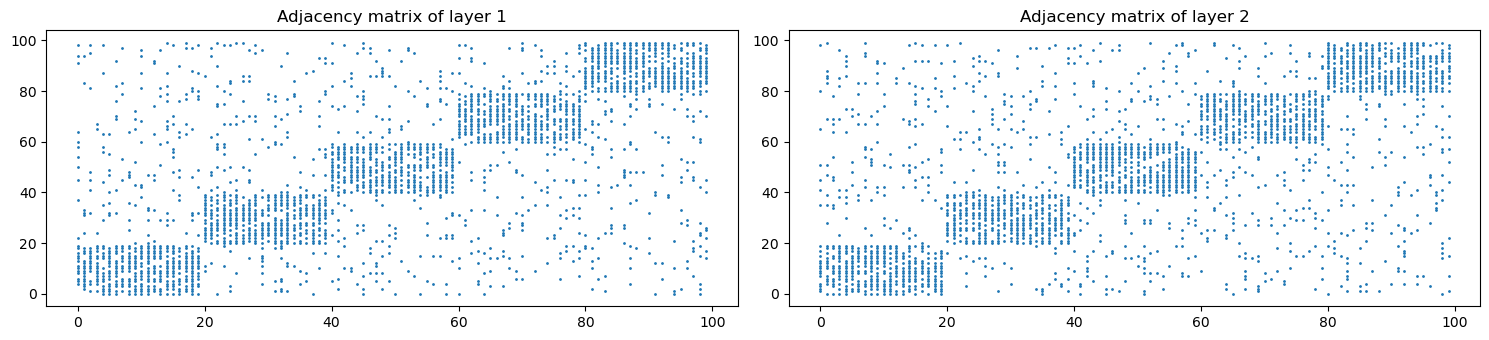

True assignment  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,1.0,1.0,1.0,1.69
SC_SR,1.0,1.0,1.0,0.12
SC_SUM,1.0,1.0,1.0,0.00
SC_AL,1.0,1.0,1.0,0.03
ourSC_SR,1.0,1.0,1.0,0.06
CoR,1.0,1.0,1.0,6.21


In [5]:
n = 100
M = 2
k = 5

p = HIGH
delta = 0.7 #should be between 0 and p ; on peut le varier varier pour avoir une courbe

prob = np.full((k,M), p)
prob_prime = np.full((k,k,M), p-delta)
clusters_size = k*[20]
algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, ourSC_SR, CoR]
metrics = [Purity, NMI, RI]
matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)
print("True assignment ", true_clusters)
results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_seq_SCSR= [2])
results

# More complicated

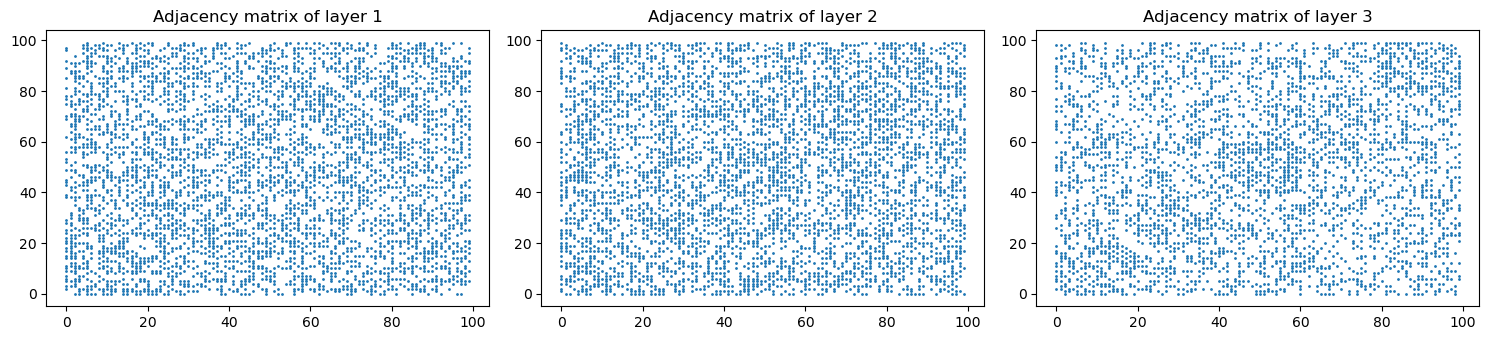

,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,0.31,0.06,0.69,2.12
SC_SR,0.39,0.16,0.70,0.20
SC_SUM,0.47,0.23,0.70,0.00
SC_AL,0.49,0.23,0.73,0.03
ourSC_SR,0.39,0.16,0.70,0.09
CoR,0.30,0.06,0.68,6.32


In [6]:
n = 100
M = 3
k = 5

p = MEDIUM

prob = np.full((k,M),0.5)
#prob[:,2] = np.array(k*[0.8])
#prob[:,3] = np.array(k*[0.8])


prob_prime1 = np.full((k,k),0.4)
prob_prime2 = np.full((k,k),0.4)
#prob_prime3 = np.full((k,k),0.8)
#prob_prime4 = np.full((k,k),0.8)
prob_prime5 = np.full((k,k),0.3)

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime5),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_seq_SCSR= [2, 1])
results

-Lorsque la premiere couche est + informative que les autres : SC_GED, CoR sont a peu pres égaux, et meilleurs que les 2 autres.

- 5 couches très peu informatives (0.4 contre .35) SC_GED surpassé par SC_SUM (logique, mais pas de bcp).

- 10 couches très peu informatives, même résultat, l'écart ne se creuse pas forcément bcp.

- 3 couches, informatives de manière différente. SC_GED et CoR équivalents, un peu devant les autres mais pas bcp

- 5 couches informatives de manière différente, même constat

- 2 couches de bruit parmi 5 couches. SC_AL, SC_SUM meilleur que les deux autres (et plutot de bcp). (0.38,0.51,0.7,0.35).

- on enlève ces 2 couches de bruits : SC_SUM et SC_AL ont leur résultats qui augmentent (bcp pour le premier), SC_GED inchangé.



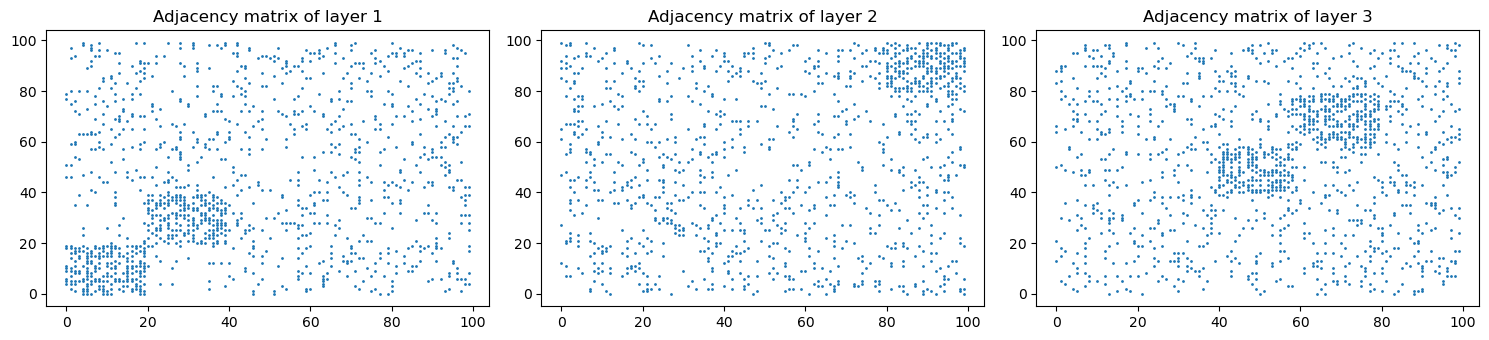

,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,0.55,0.38,0.77,2.60
SC_SR,0.56,0.34,0.76,0.21
SC_SUM,0.52,0.44,0.66,0.00
SC_AL,0.47,0.25,0.74,0.04
ourSC_SR,0.56,0.34,0.76,0.10
CoR,0.53,0.39,0.75,6.40


In [7]:
n = 100
M = 3
k = 5

p = MEDIUM

prob = np.full((k,M),0.5)
prob[:,2] = np.array([0.1, 0.1, 0.5, 0.5, 0.1])
prob[:,1] = np.array([0.1, 0.1, 0.1, 0.1, 0.5])
prob[:,0] = np.array([0.5, 0.5, 0.1, 0.1, 0.1]) #dans la couche, proba que deux mecs du cluster i soient liés


prob_prime1 = np.full((k,k),0.1) #matrice symétrique ; proba que un mec dans i et un mec dans j soient liés
prob_prime2 = np.full((k,k),0.1)
prob_prime3 = np.full((k,k),0.1)

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime3),axis=2) #shape k,k,M
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_seq_SCSR= [2, 1])
results

# M times the "same" layer

We want here to study the asymptotic behaviour of our different algorithms when $M \rightarrow \infty$ at $\delta$ fixed ; and conversely, at M fixed, the asymptotic behaviour when $\delta \rightarrow 0$. Each layer is generated with the same parameter: each layer conveys the same type of information.

## Fine-tuning of the parameter $\mu = 1/ \lambda$ in SC-SR

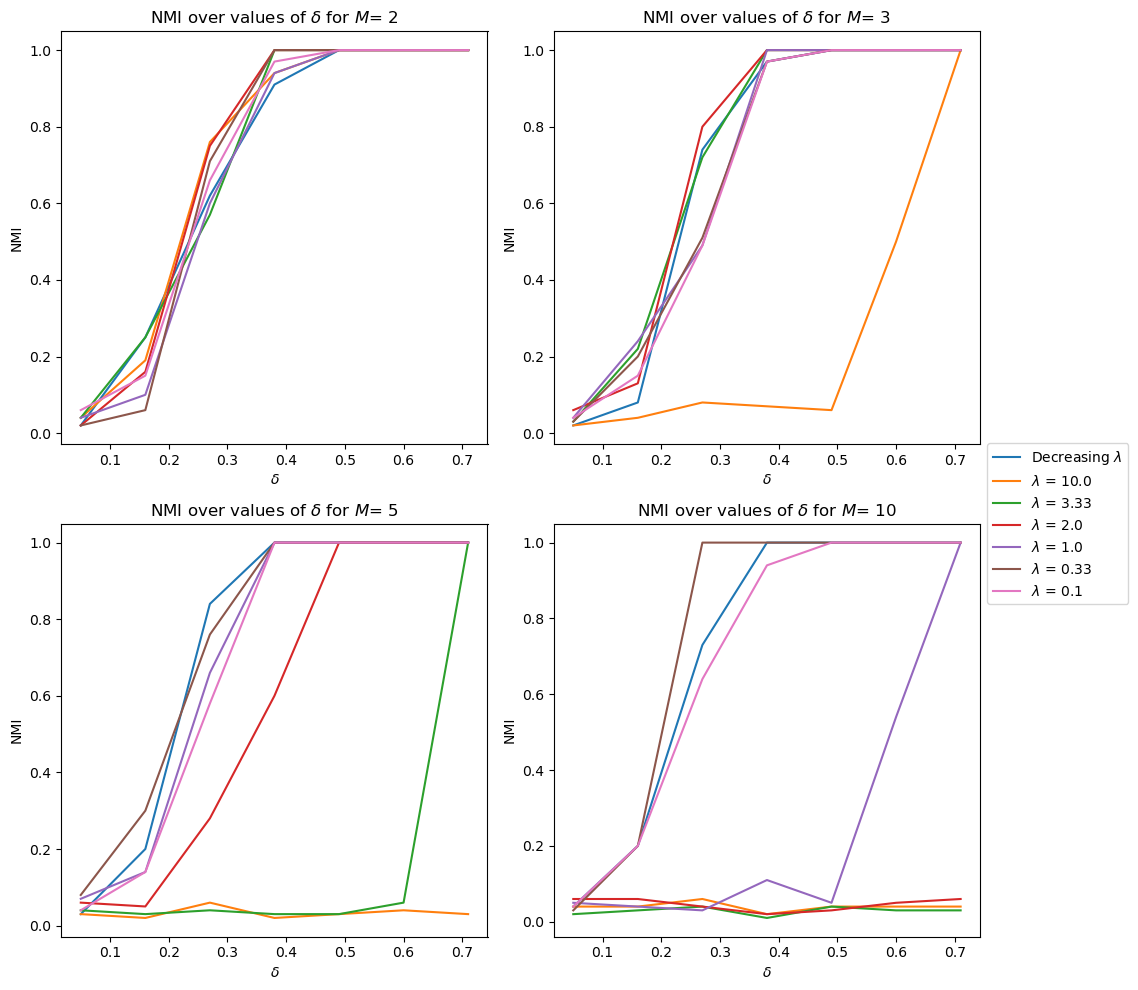

In [30]:
p = HIGH
n = 100
k = 4

mus = [0.1, 0.3, 0.5, 1, 3, 10]
deltas = np.arange(0.05, p, 0.11)
Ms = [2, 3, 5, 10]

all_res = {}
plt.subplots(figsize = (10, 10))
for idx, M in enumerate(Ms):
    plt.subplot(2, 2, Ms.index(M)+1)
    res= []
    for delta in deltas:
        prob = np.full((k,M), p)
        prob_prime = np.full((k,k,M), p-delta)
        clusters_size = k*[n //k]

        matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
        predictions, run_time = ourSC_SR(matrix, k, true_clusters = true_clusters, mu_seq = np.arange(1, M))
        
        res.append(round(NMI(predictions, true_clusters), 2))

    plt.plot(deltas, res, label = r"Decreasing $\lambda$")


    for mu in mus:
        res = []
        mu_seq_SCSR = mu*np.ones(M-1)
        for delta in deltas:
            prob = np.full((k,M), p)
            prob_prime = np.full((k,k,M), p-delta)
            clusters_size = k*[n //k]

            matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
            predictions, run_time = ourSC_SR(matrix, k, true_clusters = true_clusters, mu_seq = mu_seq_SCSR)
            
            res.append(round(NMI(predictions, true_clusters), 2))

        plt.plot(deltas, res, label = r'$\lambda$ = {}'.format(round(1/mu, 2)))

    plt.title(r'NMI over values of $\delta$ for $M$= {}'.format(M))
    plt.xlabel(r'$\delta$')
    plt.ylabel('NMI')

plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

    
    


## Benchmark

In [31]:
n = 100
p = HIGH
k = 4


algorithms = [SC_GED , ourSC_SR, CoR, SC_SUM, SC_AL]
metrics = [Purity, NMI, RI]

Ms = [2, 3, 5, 10]
deltas = np.arange(0.05, p, 0.11)
all_res = {}

for M in Ms:
    for delta in deltas:
        prob = np.full((k,M), p)
        prob_prime = np.full((k,k,M), p-delta)
        clusters_size = k*[n //k]

        matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
        results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_seq_SCSR = 3*np.ones(M-1))
        print("M = ", M, "delta = ", delta)
        print(results)
        print("\n")
        all_res[M, delta] = results



M =  2 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.38  0.07  0.64      1.12
ourSC_SR     0.34  0.04  0.62      0.08
CoR          0.35  0.04  0.63      6.55
SC_SUM       0.35  0.05  0.63      0.00
SC_AL        0.38  0.06  0.64      0.03


M =  2 delta =  0.16
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.39  0.08  0.64      0.98
ourSC_SR     0.41  0.11  0.65      0.08
CoR          0.29  0.01  0.62      5.91
SC_SUM       0.41  0.11  0.60      0.00
SC_AL        0.44  0.12  0.66      0.03


M =  2 delta =  0.27
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.92  0.78  0.92      0.92
ourSC_SR     0.91  0.76  0.91      0.07
CoR          0.69  0.49  0.80      5.98
SC_SUM       0.92  0.80  0.93      0.00
SC_AL        0.99  0.97  0.99      0.02


M =  2 delta =  0.38
           Purity   NMI    RI  Run Time
Algorithm                     

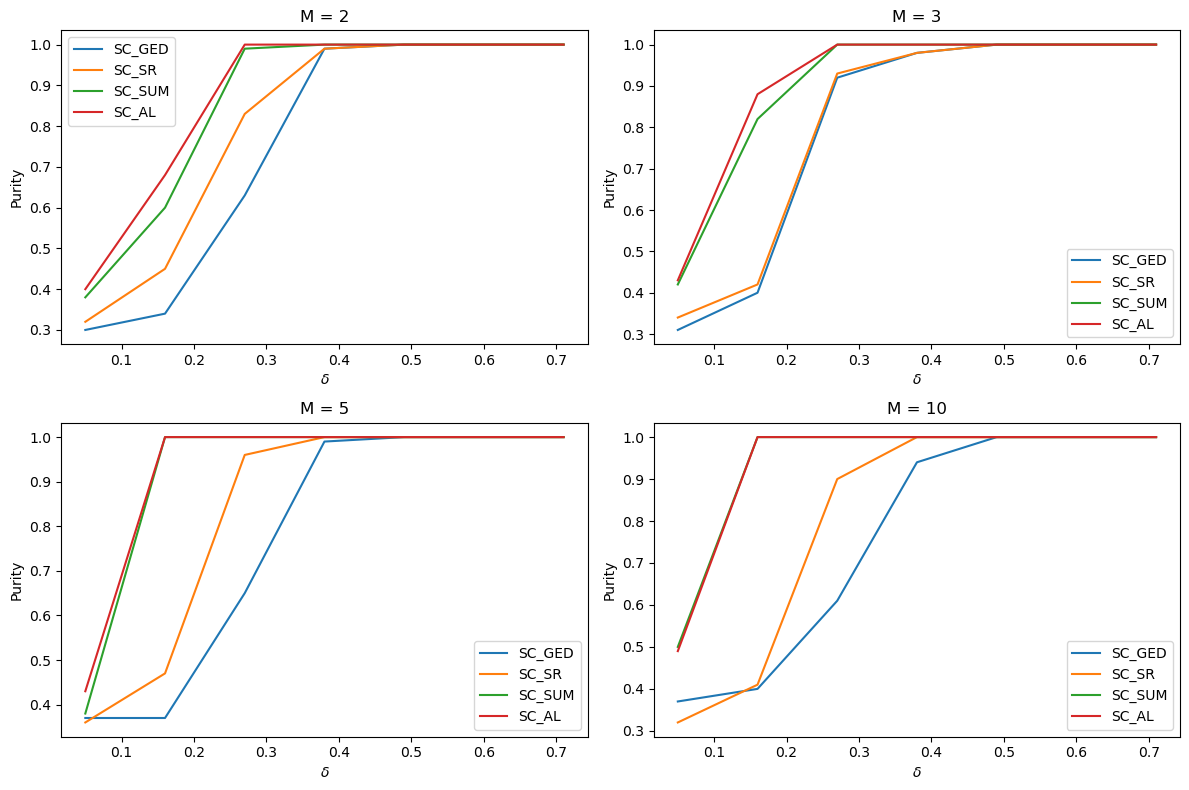

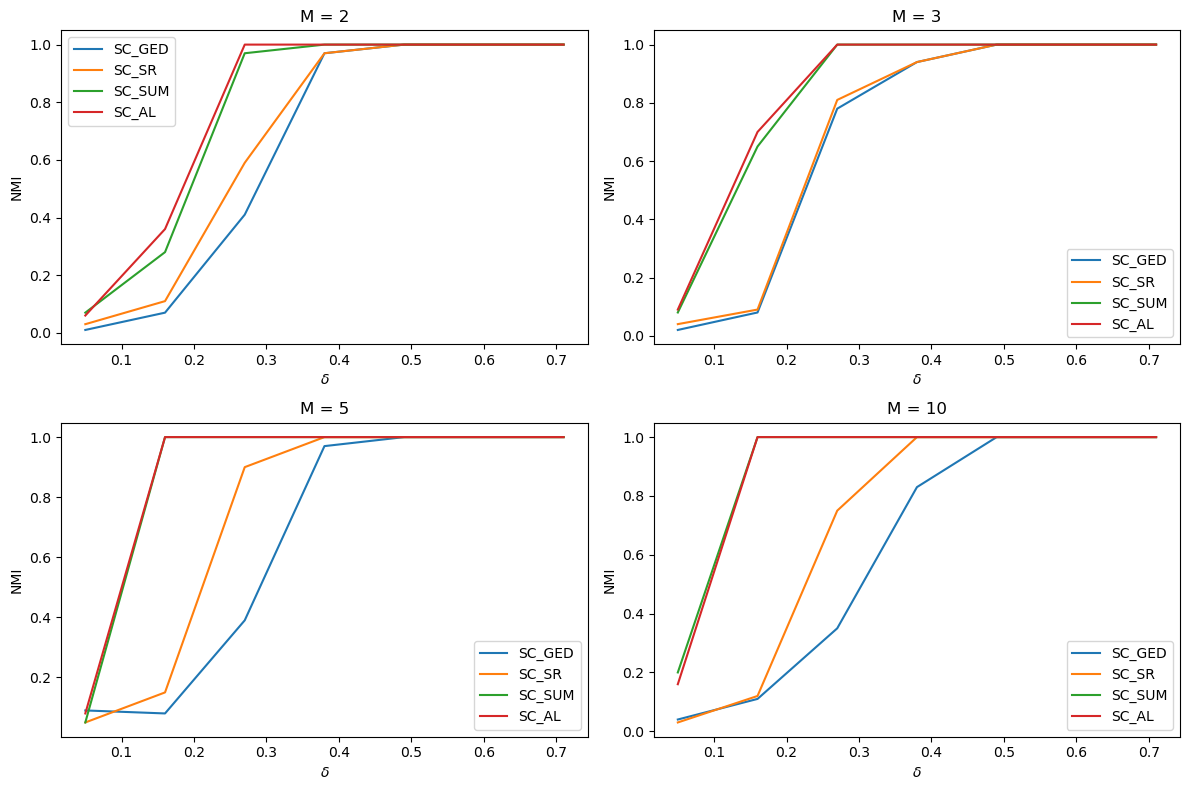

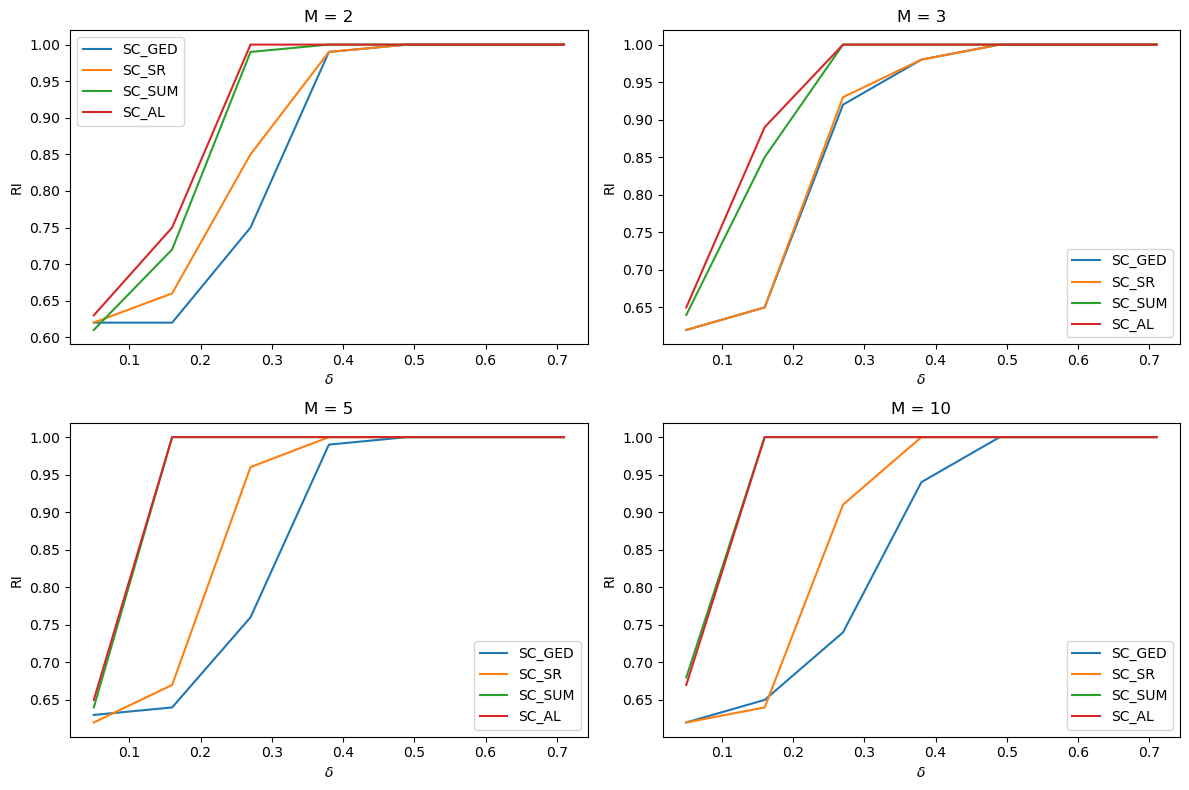

In [5]:
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    for i, M in enumerate(Ms):
        plt.subplot(2, 2, i+1)
        for algorithm in algorithms:
            data = [all_res[M, delta][metric.__name__].loc[algorithm.__name__] for delta in deltas]
            plt.plot(deltas, data, label = algorithm.__name__)

        plt.title("M = " + str(M))
        plt.xlabel(r"$\delta$")
        plt.ylabel(metric.__name__)
        plt.legend()

    plt.tight_layout()
    plt.show()


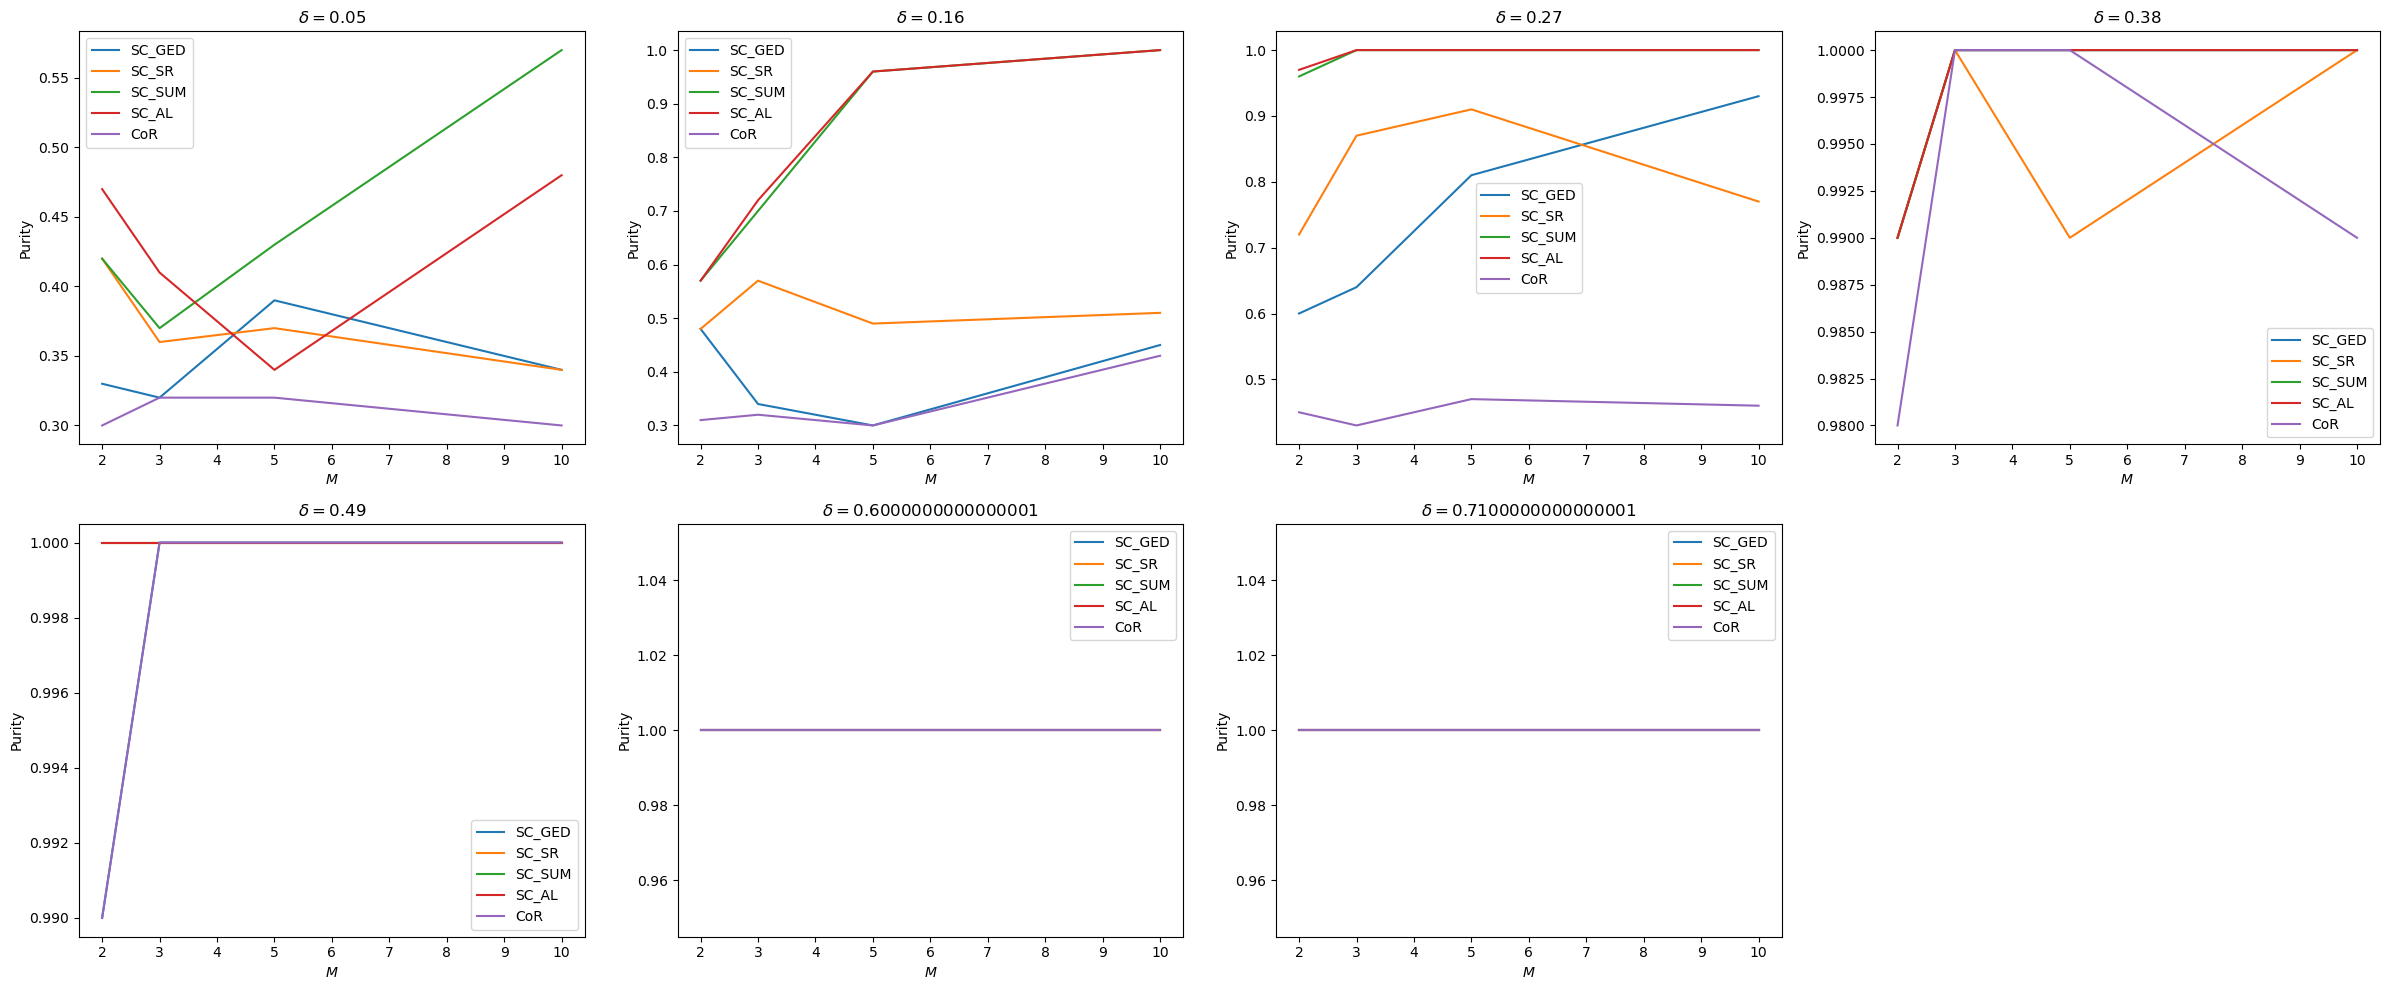

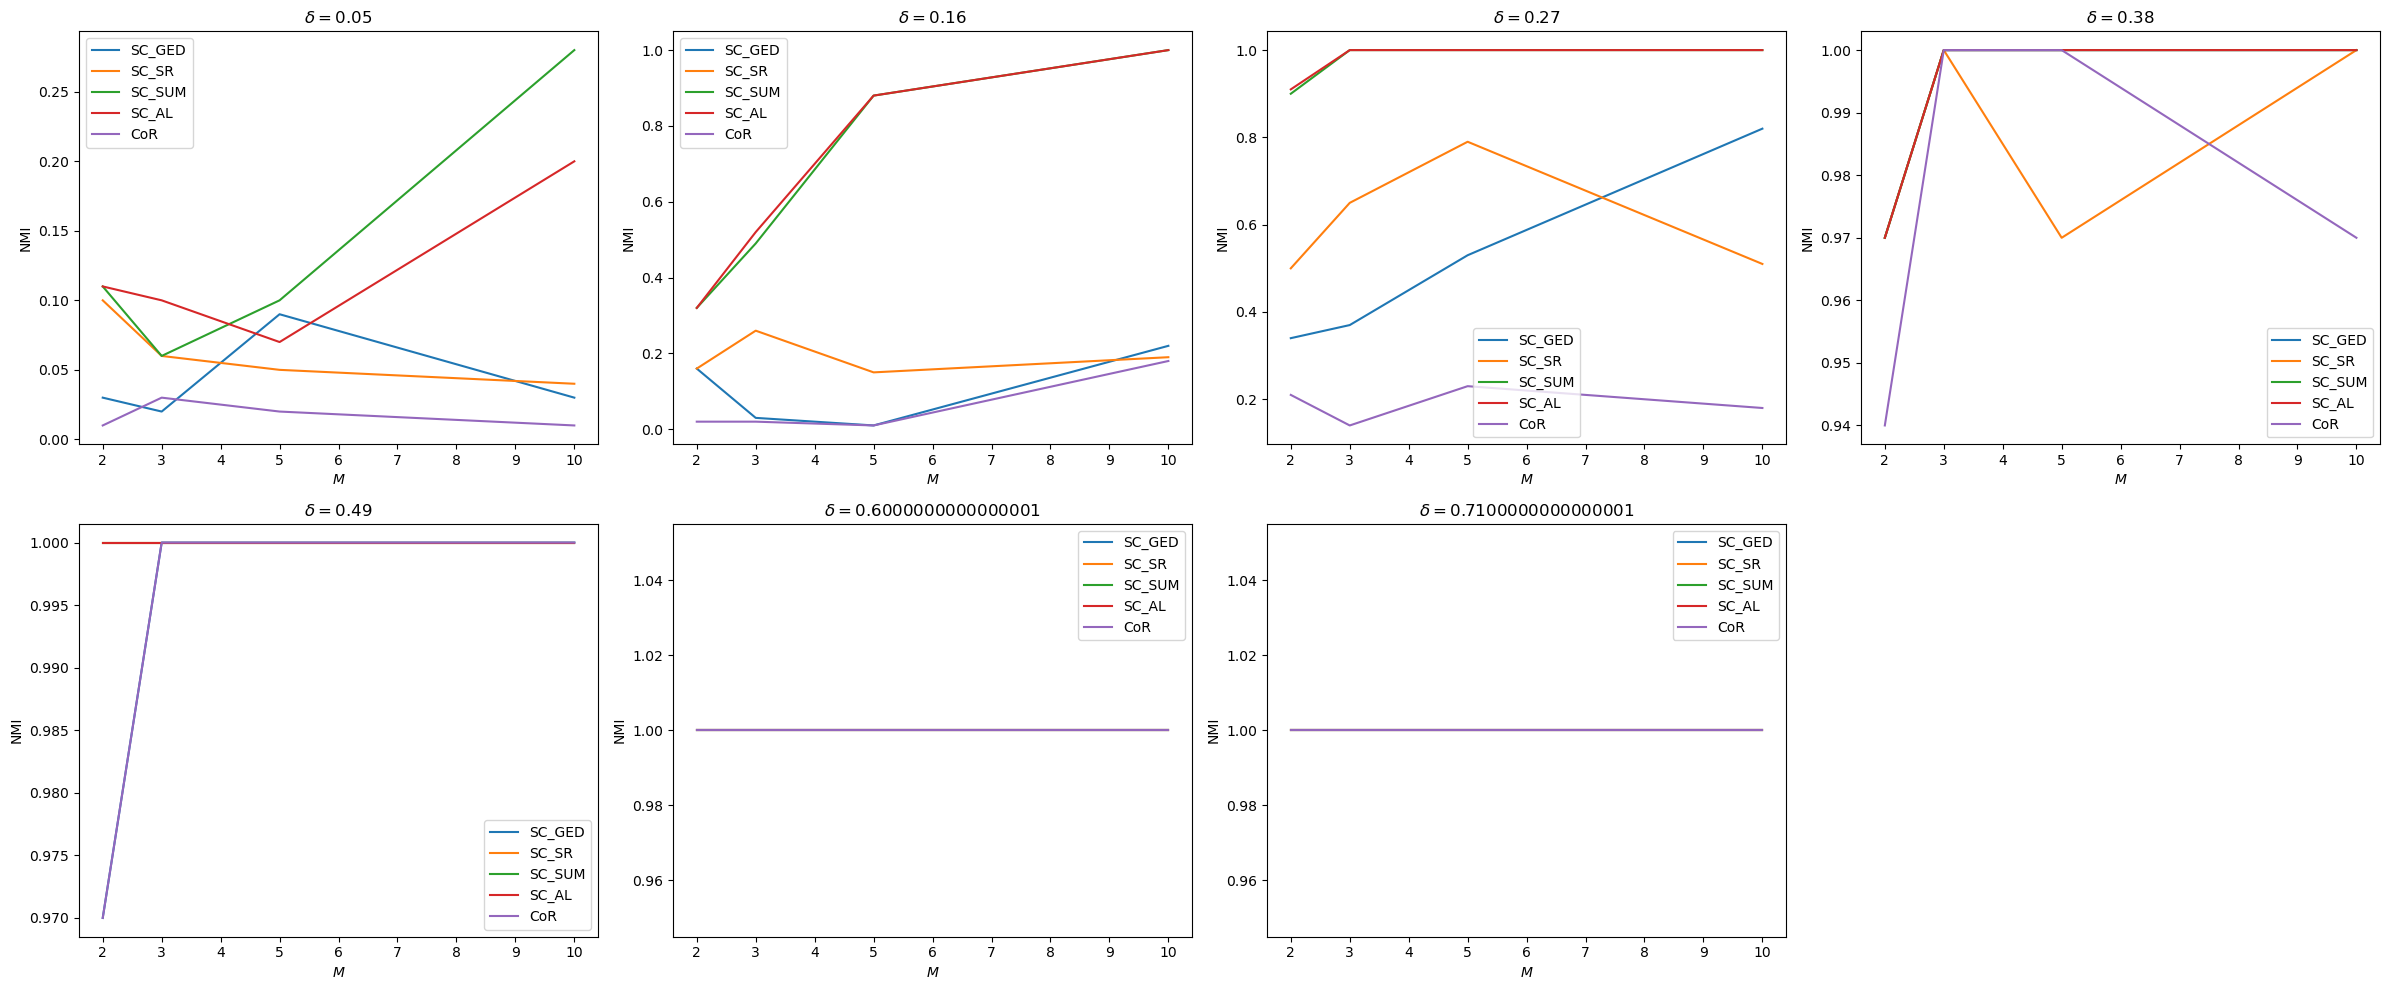

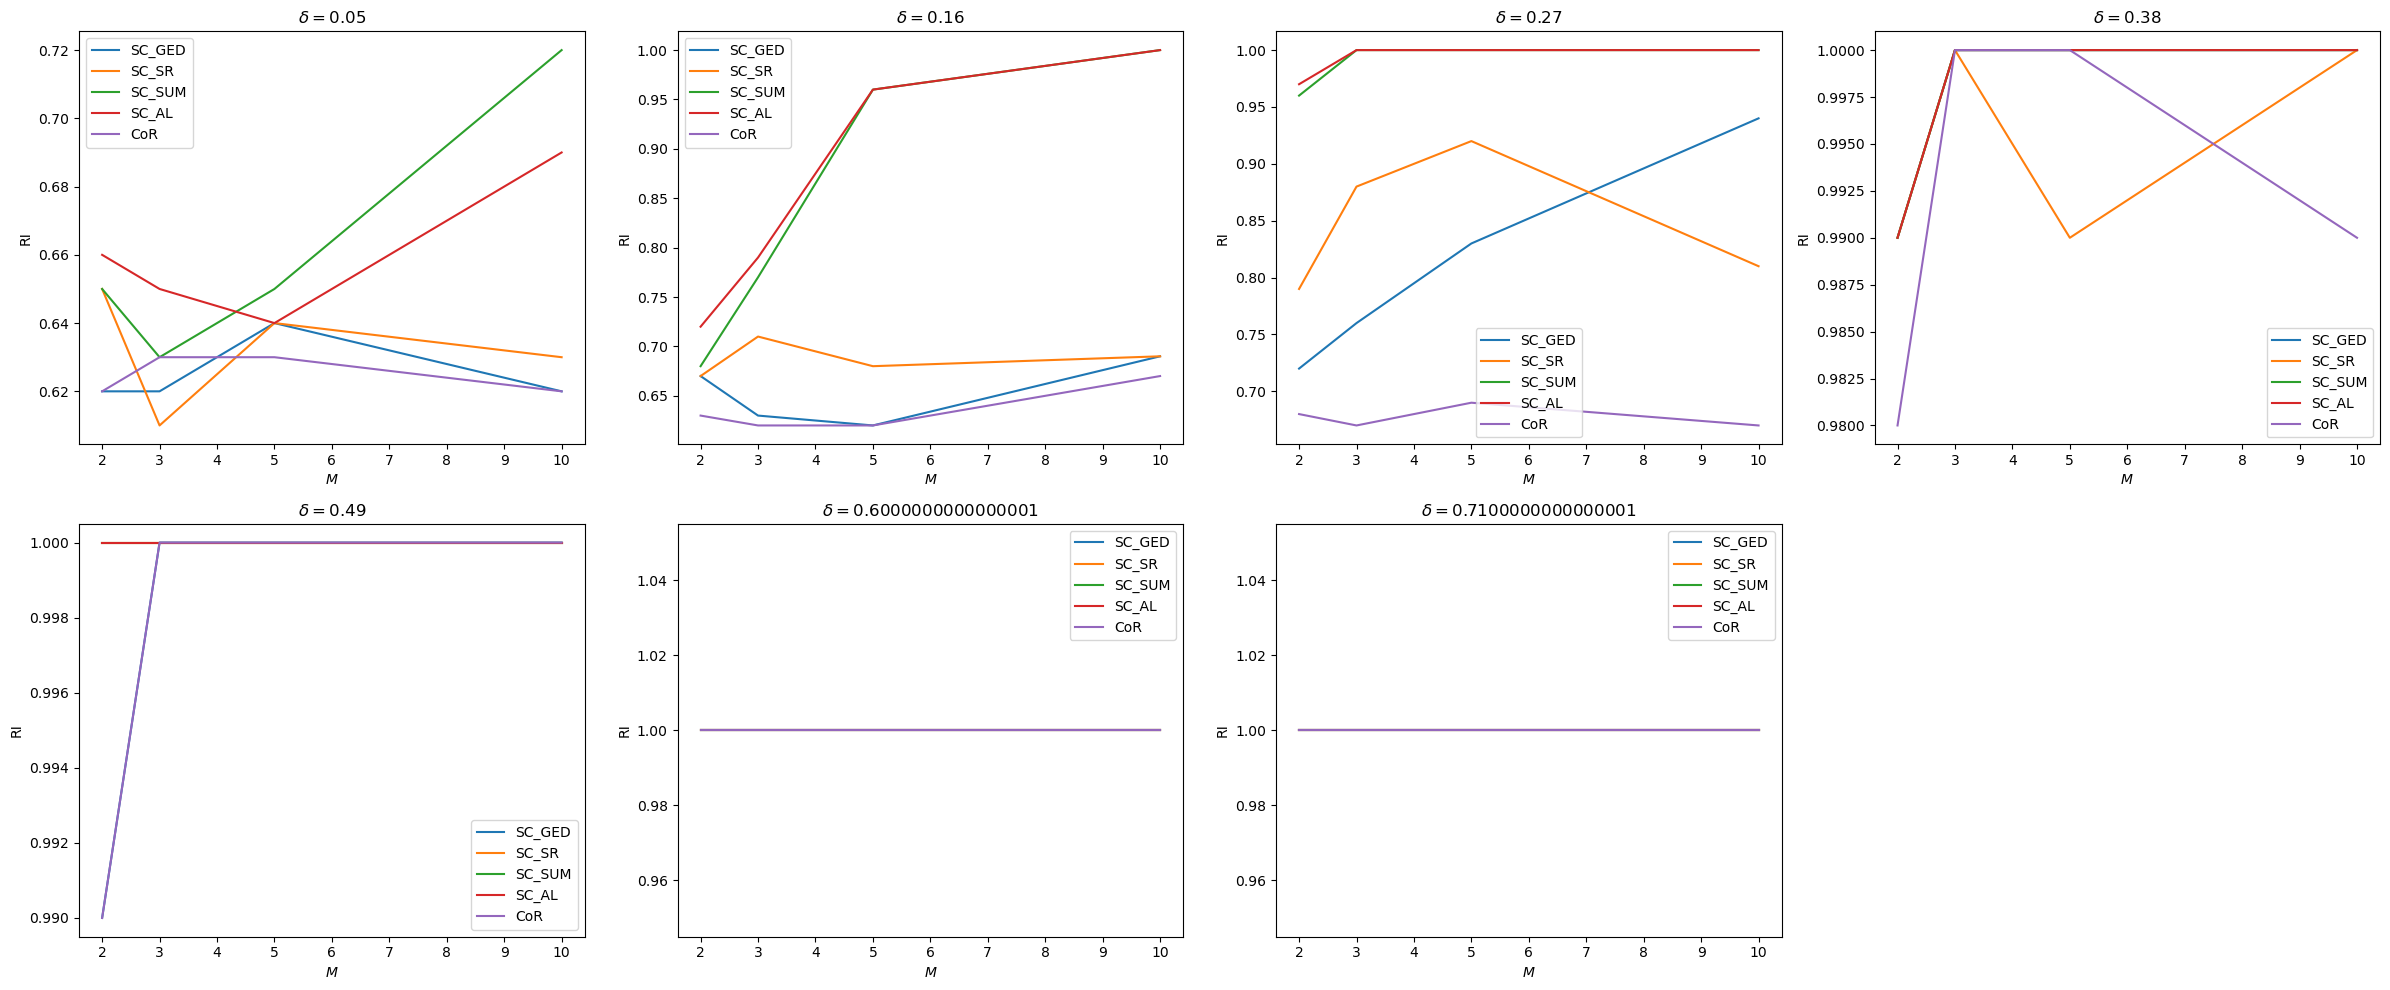

In [41]:
for metric in metrics:   
    plt.figure(figsize = (24, 10))
    for i in range(len(deltas)):
        plt.subplot(2, 4, i+1)
        delta = deltas[i]
        for algorithm in algorithms:
            data = [all_res[M, delta][metric.__name__].loc[algorithm.__name__] for M in Ms]
            plt.plot(Ms, data, label = algorithm.__name__)

        plt.title(r"$\delta = $" + str(delta))
        plt.xlabel(r"$M$")
        plt.ylabel(metric.__name__)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Each cluster per layer

[[0.8 0.1 0.1]
 [0.8 0.1 0.1]
 [0.1 0.8 0.1]
 [0.1 0.8 0.1]
 [0.1 0.1 0.8]]


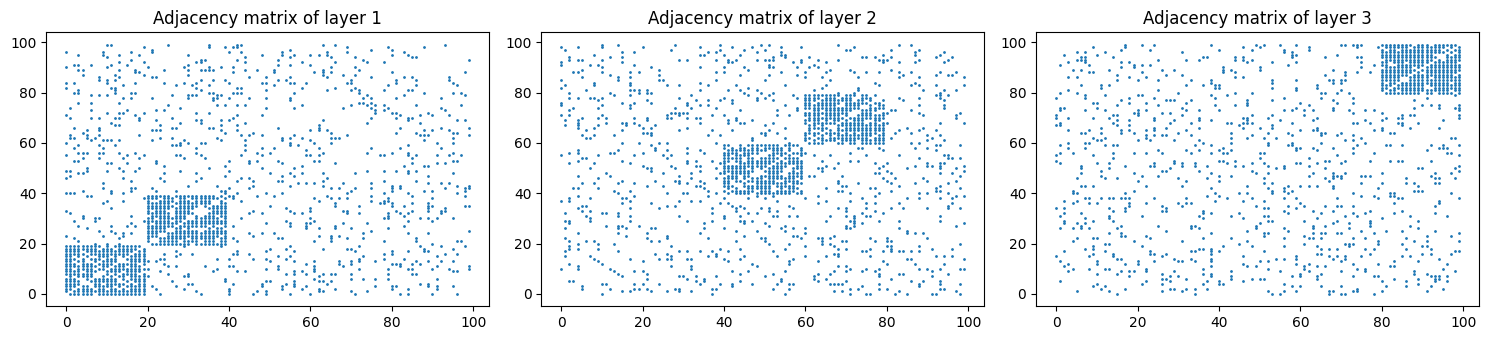

In [108]:
n = 100
M = 3
k = 5

p = 0.8
delta = 0.7
prob = np.full((k,M), p-delta)
prob[:2,0] = p
prob[2:4,1] = p
prob[4,2] = p
print(prob)
prob_prime = np.full((k,k,M), p-delta)


clusters_size = k*[20]


matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)



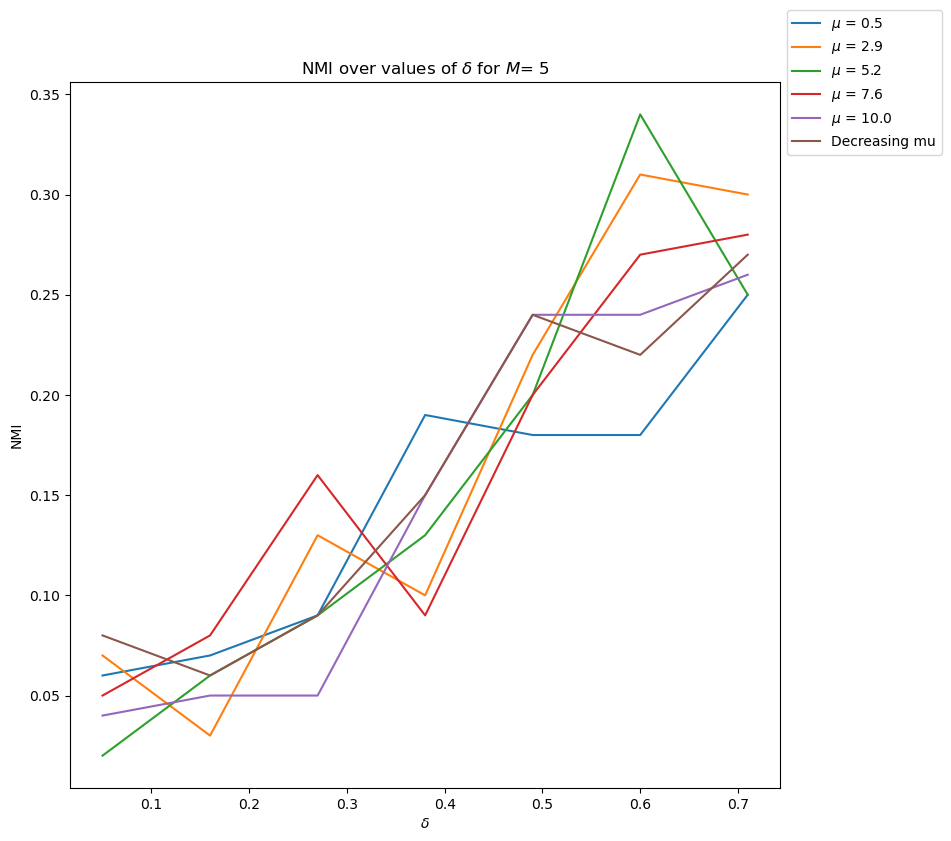

In [21]:
p = HIGH
n = 100
k = 5
M = 5

mus = np.linspace(0.5, 10, 5)
deltas = np.arange(0.05, p, 0.11)
all_res = {}
plt.subplots(figsize = (8, 8))


for mu in mus:
    res = []
    mu_seq_SCSR = mu*np.ones(M-1)
    for delta in deltas:
        prob = np.full((k,M), p-delta)
        for i in range(k):
            prob[i,i] = p 
        prob_prime = np.full((k,k,M), p-delta)
        clusters_size = k*[n //k]

        matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
        predictions, run_time = SC_SR(matrix, k, true_clusters = true_clusters, mu_seq = mu_seq_SCSR)
        
        res.append(round(NMI(predictions, true_clusters), 2))

    plt.plot(deltas, res, label = r'$\mu$ = {}'.format(round(mu, 1)))

res = []
for delta in deltas:
    prob = np.full((k,M), p-delta)
    for i in range(k):
        prob[i,i] = p 
    prob_prime = np.full((k,k,M), p-delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    predictions, run_time = SC_SR(matrix, k, true_clusters = true_clusters, mu_seq = np.sort(np.arange(1, M))[::-1])
    
    res.append(round(NMI(predictions, true_clusters), 2))

plt.plot(deltas, res, label = "Decreasing mu")
plt.title(r'NMI over values of $\delta$ for $M$= {}'.format(M))
plt.xlabel(r'$\delta$')

plt.ylabel('NMI')

plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()


We take $\mu = 7.6$. 

In [58]:
mu_SCSR = 7.6

## Benchmark

In [94]:
n = 100
p = HIGH
k = 5
M = 5


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, p, 0.11)
all_res = {}

for delta in deltas:
    print("Next iteration, delta = ",delta)
    prob = np.full((k,M), p-delta)
    for i in range(k):
        prob[i,i] = p
    prob_prime = np.full((k,k,M), p-delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = mu_SCSR)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

Next iteration, delta =  0.05


M =  5 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.34  0.08  0.69     14.61
SC_SR        0.32  0.05  0.68      0.72
SC_SUM       0.29  0.04  0.68      0.00
SC_AL        0.30  0.05  0.69      0.22
CoR          0.30  0.04  0.68     24.03


Next iteration, delta =  0.16
M =  5 delta =  0.16
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.30  0.04  0.69     12.08
SC_SR        0.29  0.04  0.68      1.71
SC_SUM       0.33  0.07  0.69      0.00
SC_AL        0.32  0.06  0.69      0.21
CoR          0.36  0.11  0.70     27.37


Next iteration, delta =  0.27
M =  5 delta =  0.27
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.33  0.06  0.69     14.30
SC_SR        0.34  0.09  0.69      0.61
SC_SUM       0.34  0.08  0.67      0.00
SC_AL        0.34  0.11  0.69      0.16
CoR          0.33  0.06  0.69     34.85


Next iteration, delta =  0.38
M

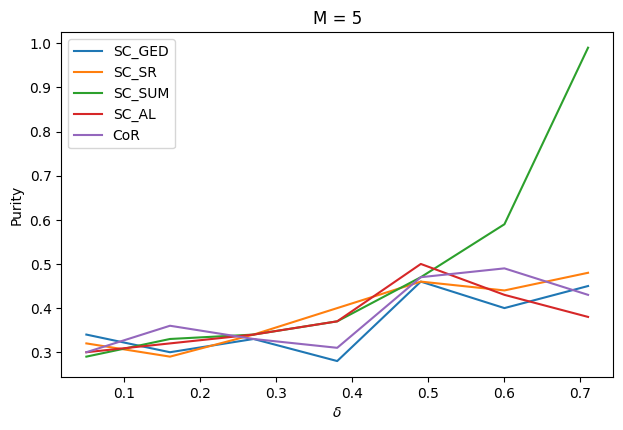

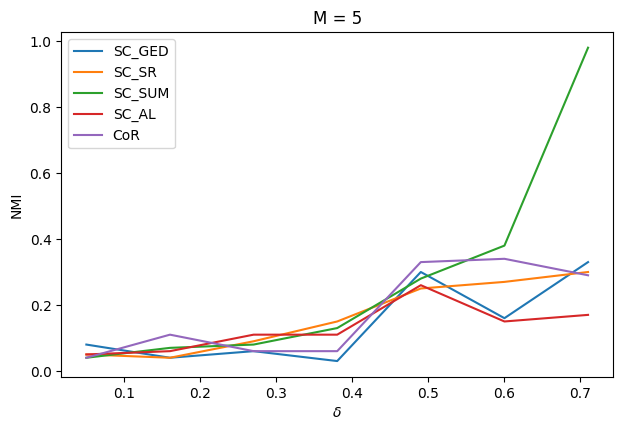

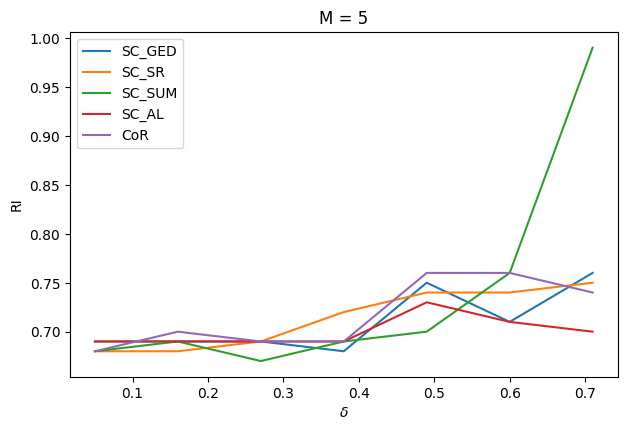

In [96]:
deltas = np.arange(0.05, p, 0.11)
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [100]:
n = 100
p = MEDIUM
k = 5
M = 5


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, p, 0.05)
all_res = {}

for delta in deltas:
    print("Next iteration, delta = ",delta)
    prob = np.full((k,M), p-delta)
    for i in range(k):
        prob[i,i] = p
    prob_prime = np.full((k,k,M), p-delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = mu_SCSR)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

Next iteration, delta =  0.05
M =  5 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.34  0.06  0.69     21.79
SC_SR        0.28  0.04  0.68      0.41
SC_SUM       0.29  0.06  0.67      0.00
SC_AL        0.30  0.04  0.69      0.15
CoR          0.33  0.07  0.69     27.28


Next iteration, delta =  0.1
M =  5 delta =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.26  0.03  0.68     17.95
SC_SR        0.38  0.13  0.71      0.57
SC_SUM       0.34  0.10  0.68      0.00
SC_AL        0.33  0.07  0.69      0.14
CoR          0.30  0.05  0.69     28.50


Next iteration, delta =  0.15000000000000002
M =  5 delta =  0.15000000000000002
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.32  0.05  0.69     23.11
SC_SR        0.35  0.10  0.69      0.90
SC_SUM       0.33  0.08  0.67      0.00
SC_AL        0.37  0.09  0.69      0.44
CoR          0.

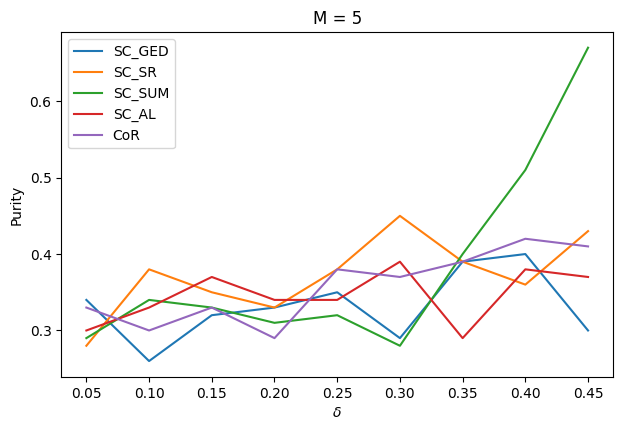

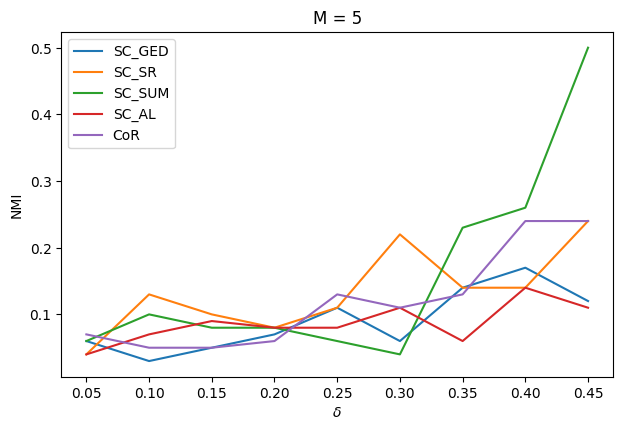

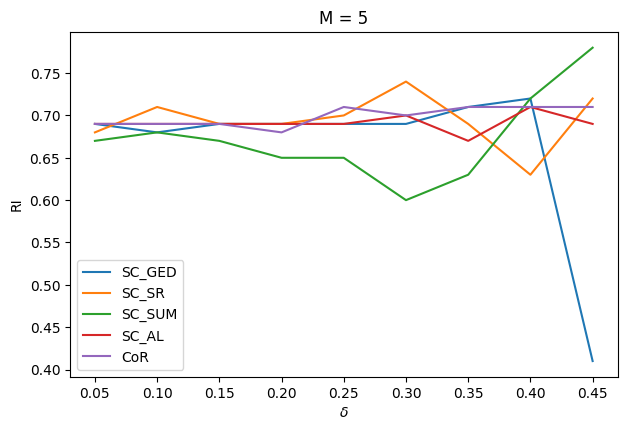

In [102]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [110]:
n = 100
p = HIGH
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, p, 0.1)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p-delta)
    prob[:2,0] = p
    prob[2:4,1] = p
    prob[4,2] = p
    prob_prime = np.full((k,k,M), p-delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = mu_SCSR)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  3 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.06  0.69      6.52
SC_SR        0.33  0.07  0.69      0.50
SC_SUM       0.28  0.06  0.69      0.00
SC_AL        0.32  0.07  0.68      0.19
CoR          0.32  0.04  0.69     29.50


M =  3 delta =  0.15000000000000002
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.32  0.07  0.69      6.01
SC_SR        0.28  0.04  0.68      0.28
SC_SUM       0.34  0.07  0.68      0.00
SC_AL        0.35  0.07  0.69      0.10
CoR          0.30  0.05  0.69     31.00


M =  3 delta =  0.25000000000000006
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.30  0.05  0.69      8.42
SC_SR        0.37  0.14  0.70      0.42
SC_SUM       0.30  0.07  0.65      0.00
SC_AL        0.34  0.11  0.69      0.18
CoR          0.29  0.03  0.68     29.18


M =  3 delta =  0.35000000000000003
           Purity   NMI  

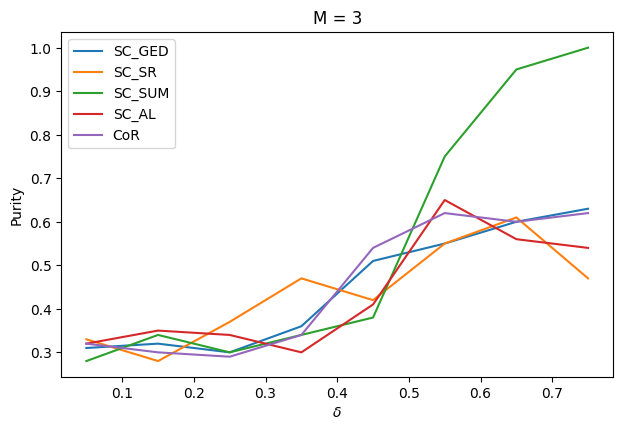

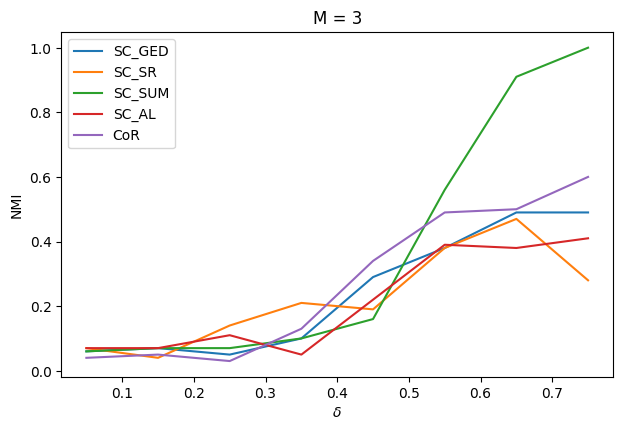

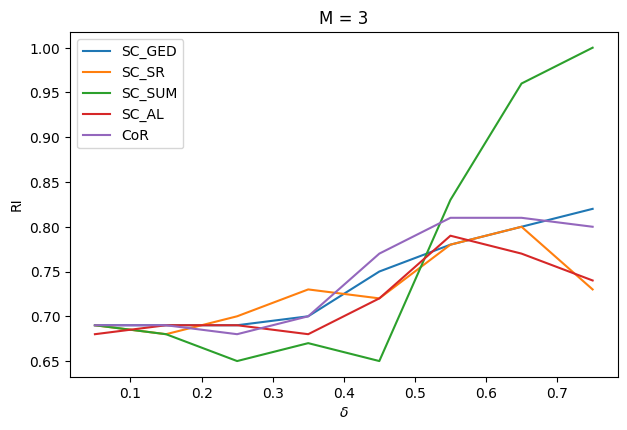

In [111]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()


In [118]:
n = 100
p = HIGH
k = 5
M = 2


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, p, 0.1)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p-delta)
    prob[:3,0] = p
    prob[3:,1] = p
    prob_prime = np.full((k,k,M), p-delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = mu_SCSR)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  2 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.07  0.69      4.60
SC_SR        0.30  0.06  0.67      0.21
SC_SUM       0.32  0.07  0.66      0.00
SC_AL        0.34  0.09  0.69      0.10
CoR          0.31  0.07  0.69     27.64


M =  2 delta =  0.15000000000000002
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.38  0.09  0.69      4.41
SC_SR        0.38  0.14  0.71      0.31
SC_SUM       0.30  0.08  0.61      0.00
SC_AL        0.31  0.06  0.68      0.10
CoR          0.32  0.06  0.69     27.88


M =  2 delta =  0.25000000000000006
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.34  0.12  0.70      5.16
SC_SR        0.36  0.11  0.70      0.22
SC_SUM       0.33  0.12  0.54      0.00
SC_AL        0.44  0.20  0.72      0.12
CoR          0.31  0.06  0.69     26.63


M =  2 delta =  0.35000000000000003
           Purity   NMI  

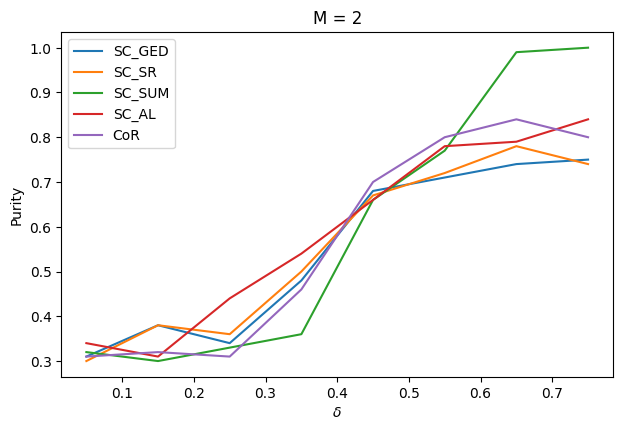

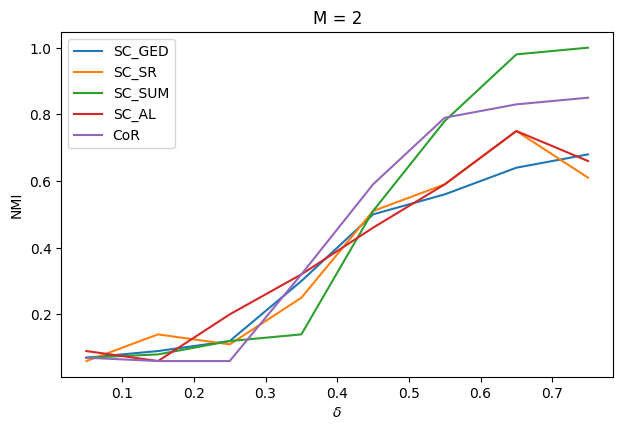

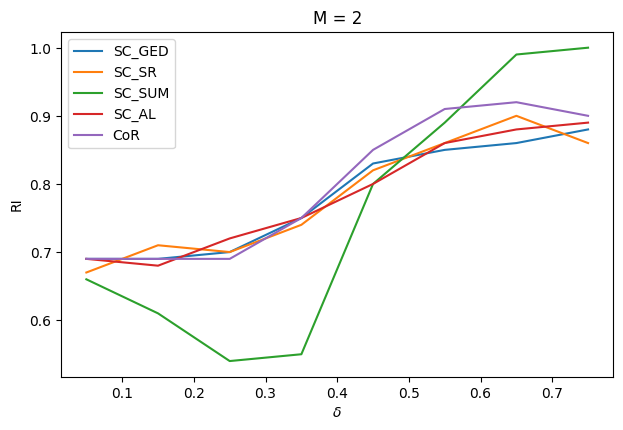

In [119]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

## Layers with different probas of being friends

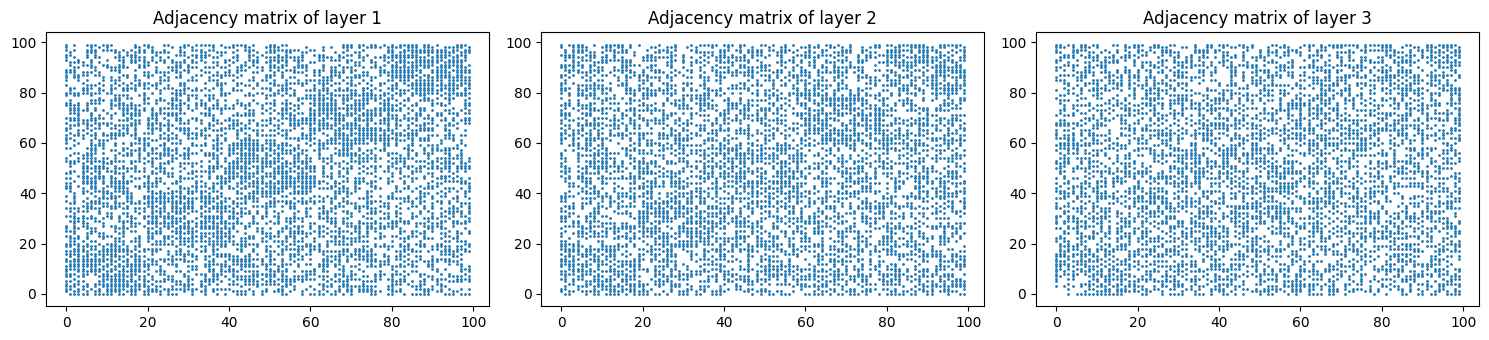

In [11]:
n = 100
M = 3
k = 5

p = HIGH
delta = 0.1
prob = np.full((k,M), p-delta)
prob[:,0] = p 
prob[:,1] = p - delta
prob[:,2] = p -2* delta
prob_prime = np.full((k,k,M), p-3*delta)


clusters_size = k*[20]


matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)



In [14]:
n = 100
p = HIGH
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, 0.25, 0.05)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p-delta)
    prob[:,0] = p 
    prob[:,1] = p - delta
    prob[:,2] = p -2* delta
    prob_prime = np.full((k,k,M), p-3*delta)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  3 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.38  0.12  0.70      6.66
SC_SR        0.43  0.17  0.71      0.49
SC_SUM       0.35  0.08  0.69      0.00
SC_AL        0.37  0.10  0.70      0.34
CoR          0.29  0.04  0.68     30.51


M =  3 delta =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.62  0.49  0.80      7.33
SC_SR        0.56  0.39  0.77      0.52
SC_SUM       0.85  0.67  0.89      0.00
SC_AL        0.89  0.75  0.92      0.18
CoR          0.34  0.17  0.71     29.95


M =  3 delta =  0.15000000000000002
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.99  0.98  0.99      9.86
SC_SR        0.99  0.98  0.99      0.51
SC_SUM       1.00  1.00  1.00      0.00
SC_AL        1.00  1.00  1.00      0.08
CoR          0.77  0.74  0.89     26.23


M =  3 delta =  0.2
           Purity  NMI   RI  Run Time
Algorithm          

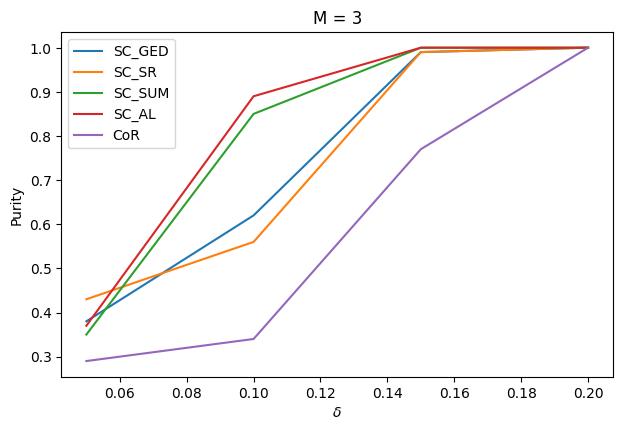

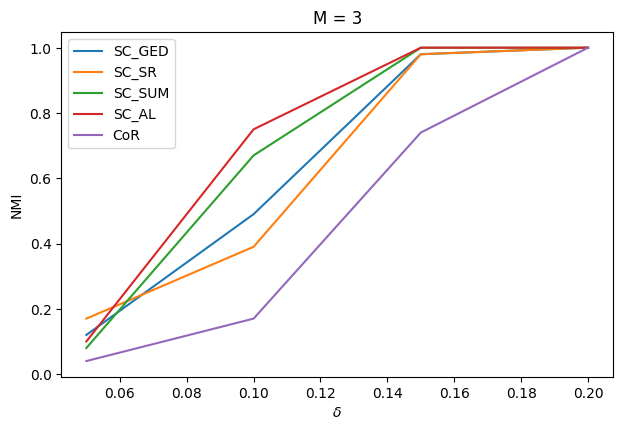

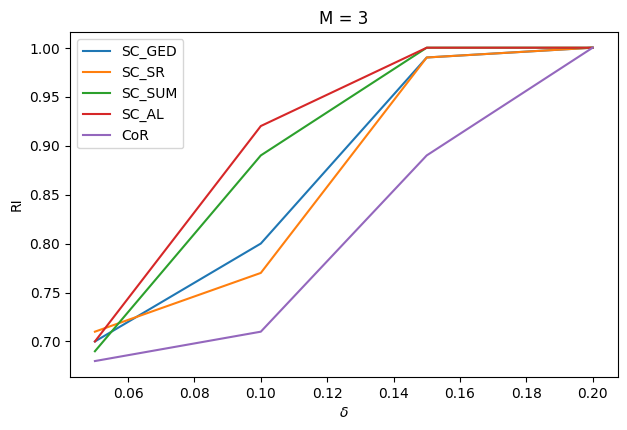

In [15]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [26]:
n = 100
p = HIGH
k = 5
M = 5


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.02, 0.2, 0.03)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p-delta)
    prob[:,0] = p - delta
    prob[:,1] = p - delta
    prob[:,2] = p - delta
    prob[:,3] = p - delta
    prob[:,4] = 0.3

    prob_prime = np.full((k,k,M), p-2*delta)
    prob_prime[:,:,M-1] = np.full((k,k),0.1)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  5 delta =  0.02
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.29  0.06  0.68     17.88
SC_SR        0.62  0.31  0.77      0.42
SC_SUM       0.33  0.09  0.70      0.00
SC_AL        0.41  0.19  0.72      0.22
CoR          0.31  0.07  0.69     28.91


M =  5 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.06  0.69     16.32
SC_SR        0.51  0.23  0.73      0.65
SC_SUM       0.33  0.09  0.69      0.00
SC_AL        0.39  0.19  0.68      0.15
CoR          0.28  0.04  0.68     29.23


M =  5 delta =  0.08
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.08  0.67     19.41
SC_SR        0.63  0.39  0.79      0.53
SC_SUM       0.54  0.29  0.75      0.00
SC_AL        0.56  0.33  0.77      0.15
CoR          0.30  0.07  0.69     24.98


M =  5 delta =  0.11000000000000001
           Purity   NMI    RI  Run Time
Algorithm      

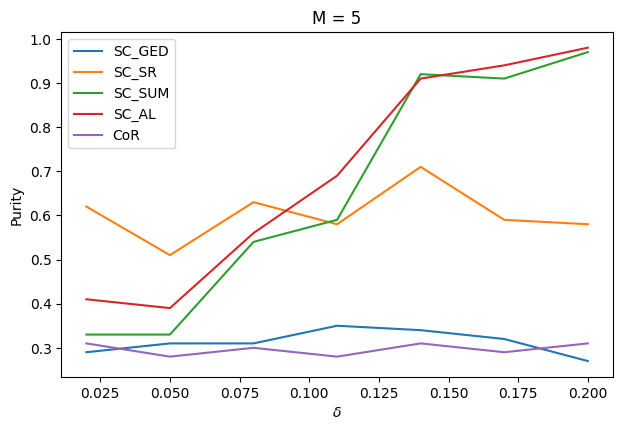

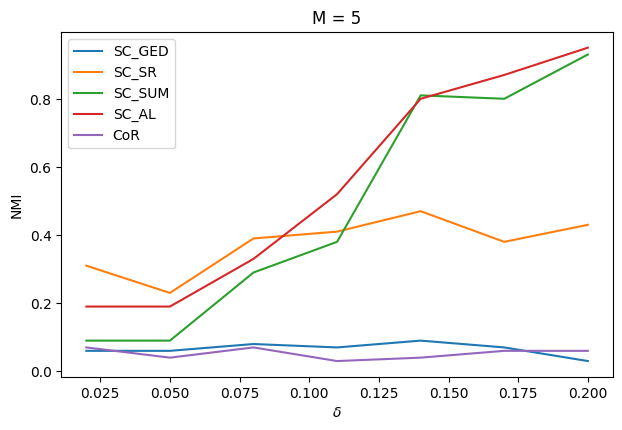

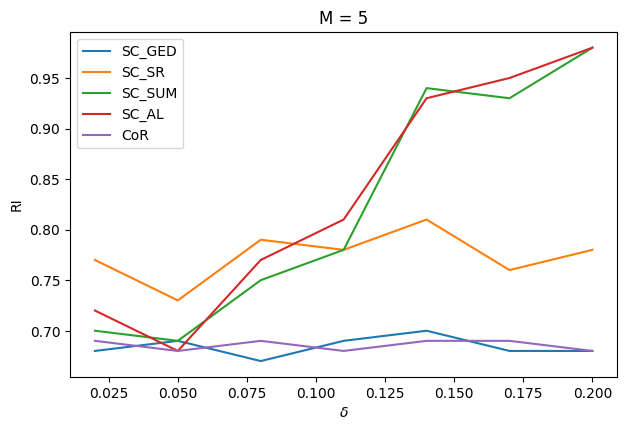

In [27]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [32]:
n = 100
p = HIGH
k = 5
M = 5


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.02, 0.2, 0.03)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p-delta)
    prob[:,0] = p - delta
    prob[:,1] = p - delta
    prob[:,2] = p - delta
    prob[:,3] = p - delta
    prob[:,4] = 0.5

    prob_prime = np.full((k,k,M), p-2*delta)
    prob_prime[:,:,M-1] = np.full((k,k),0.2)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  5 delta =  0.02
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.06  0.69     18.08
SC_SR        0.74  0.52  0.83      0.67
SC_SUM       0.45  0.21  0.73      0.00
SC_AL        0.61  0.39  0.79      0.14
CoR          0.27  0.02  0.68     29.59


M =  5 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.29  0.04  0.68     15.71
SC_SR        0.89  0.77  0.92      0.70
SC_SUM       0.47  0.27  0.74      0.00
SC_AL        0.86  0.72  0.90      0.22
CoR          0.24  0.01  0.68     27.68


M =  5 delta =  0.08
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.31  0.06  0.68     17.11
SC_SR        0.30  0.07  0.69      0.70
SC_SUM       0.71  0.52  0.83      0.00
SC_AL        0.76  0.54  0.84      0.19
CoR          0.28  0.03  0.68     29.19


M =  5 delta =  0.11000000000000001
           Purity   NMI    RI  Run Time
Algorithm      

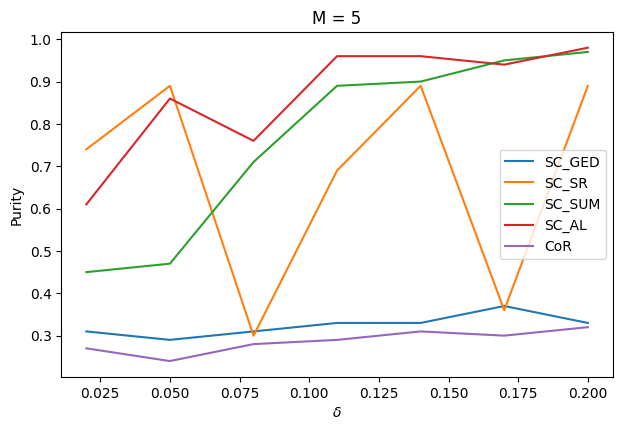

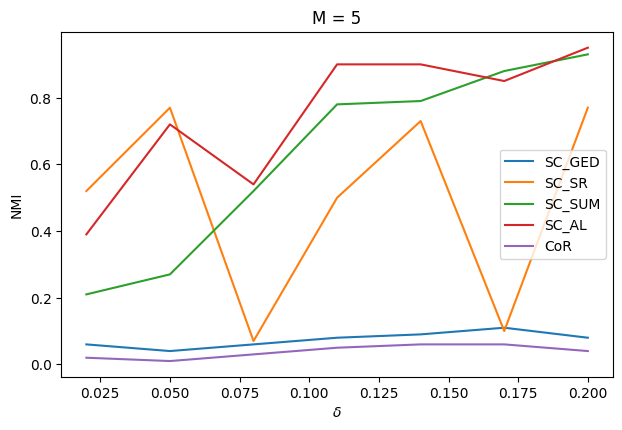

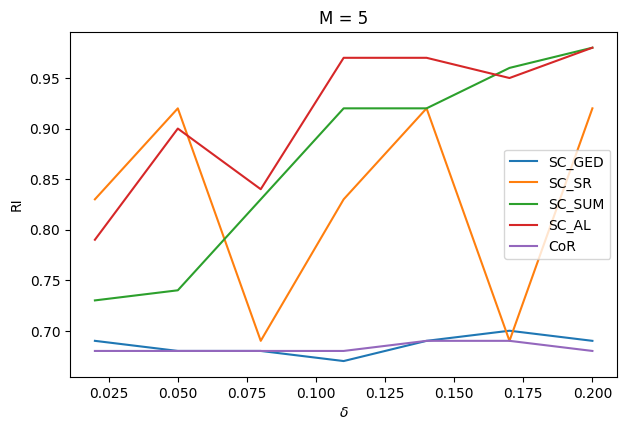

In [33]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

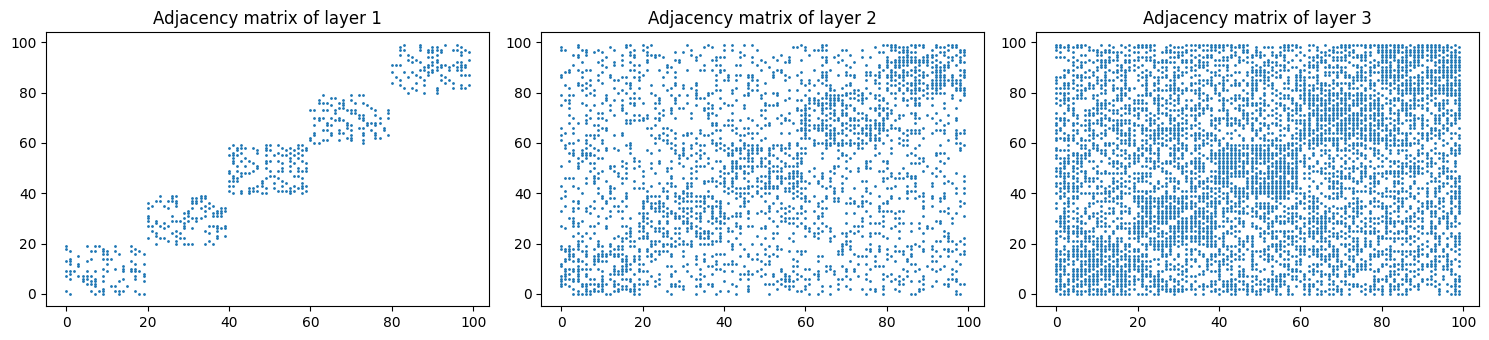

In [77]:
n = 100
M = 3
k = 5

p = HIGH
delta = 0.3
prob = np.full((k,M), p)
prob[:,0] = LOW 
prob[:,1] = MEDIUM
prob[:,2] = HIGH
prob_prime = np.full((k,k,M), p)
prob_prime[:,:,0] = np.full((k,k), LOW - delta)
prob_prime[:,:,1] = np.full((k,k), MEDIUM - delta)
prob_prime[:,:,2] = np.full((k,k), HIGH - delta)


clusters_size = k*[20]


matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)



In [80]:
n = 100
p = HIGH
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

deltas = np.arange(0.05, 0.3, 0.05)
all_res = {}

for delta in deltas:
    prob = np.full((k,M), p)
    prob[:,2] = LOW 
    prob[:,1] = MEDIUM
    prob[:,0] = HIGH
    prob_prime = np.full((k,k,M), p)
    prob_prime[:,:,2] = np.full((k,k), LOW - delta)
    prob_prime[:,:,1] = np.full((k,k), MEDIUM - delta)
    prob_prime[:,:,0] = np.full((k,k), HIGH - delta)


    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "delta = ", delta)
    print(results)
    print("\n")
    all_res[M, delta] = results

M =  3 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.32  0.06  0.68     15.78
SC_SR        0.31  0.08  0.69      0.43
SC_SUM       0.32  0.07  0.66      0.00
SC_AL        0.30  0.06  0.69      0.20
CoR          0.31  0.06  0.69     32.67


M =  3 delta =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.35  0.09  0.70     14.94
SC_SR        0.31  0.08  0.69      0.61
SC_SUM       0.40  0.15  0.69      0.00
SC_AL        0.44  0.15  0.72      0.15
CoR          0.30  0.05  0.69     29.67


M =  3 delta =  0.15000000000000002
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.30  0.06  0.68      9.87
SC_SR        0.50  0.23  0.74      0.43
SC_SUM       0.57  0.39  0.76      0.00
SC_AL        0.57  0.30  0.75      0.18
CoR          0.29  0.07  0.69     30.61


M =  3 delta =  0.2
           Purity   NMI    RI  Run Time
Algorithm        

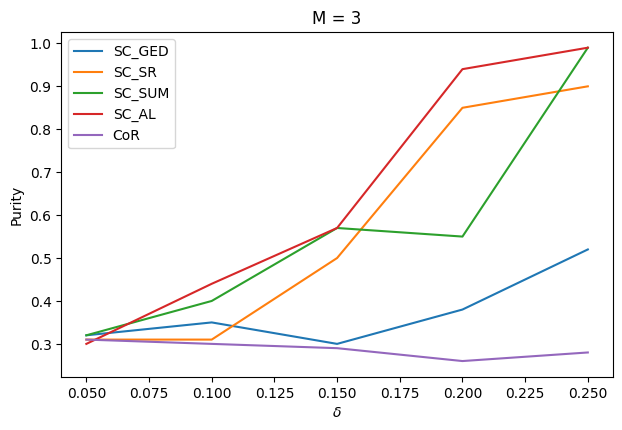

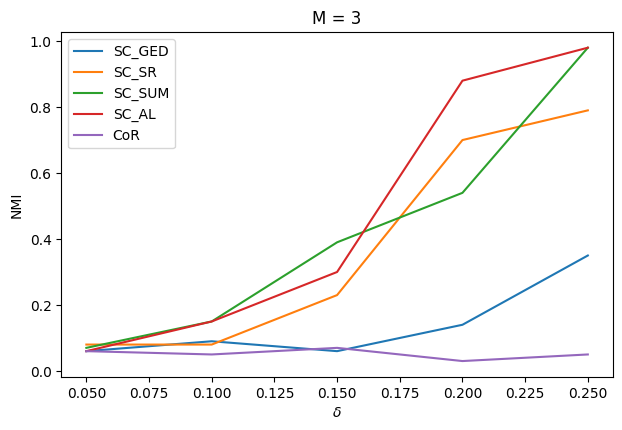

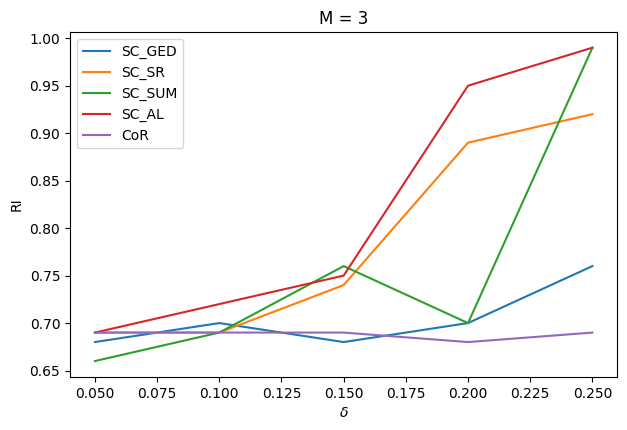

In [81]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, deltas[i]][metric.__name__].loc[algorithm.__name__] for i in range(deltas.shape[0])]
        plt.plot(deltas, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$\delta$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

## Noise

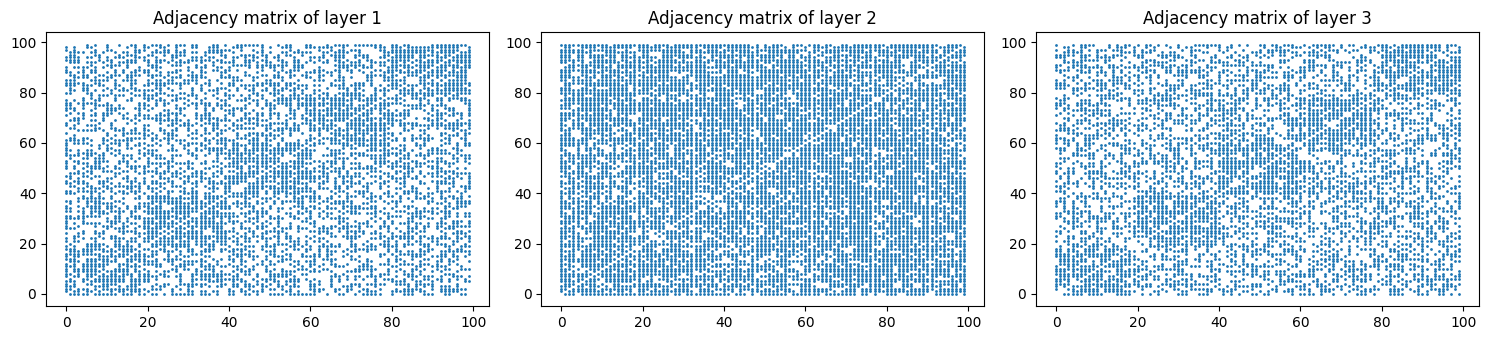

In [39]:
n = 100
M = 3
k = 5

p = HIGH
delta = 0.3
noise = 0.8
prob = np.full((k,M), p)
prob[:,1] = noise
prob_prime = np.full((k,k,M), p-delta)
prob_prime[:,:,1] = np.full((k,k),noise)


clusters_size = k*[20]


matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)



In [41]:
n = 100
p = HIGH
delta = 0.2
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

noises = np.arange(0.1, 0.9, 0.1)
all_res = {}

for noise in noises:
    prob = np.full((k,M), p)
    prob[:,1] = noise
    prob_prime = np.full((k,k,M), p-delta)
    prob_prime[:,:,1] = np.full((k,k),noise)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "noise = ", noise)
    print(results)
    print("\n")
    all_res[M, noise] = results

M =  3 noise =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.43  0.23  0.73     13.97
SC_SR        0.50  0.27  0.74      1.06
SC_SUM       0.47  0.23  0.70      0.00
SC_AL        0.34  0.08  0.69      0.30
CoR          0.36  0.09  0.70     36.22


M =  3 noise =  0.2
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.43  0.17  0.71      7.93
SC_SR        0.55  0.34  0.76      0.46
SC_SUM       0.35  0.17  0.71      0.00
SC_AL        0.35  0.08  0.69      0.10
CoR          0.32  0.06  0.69     26.69


M =  3 noise =  0.30000000000000004
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.40  0.16  0.71      8.48
SC_SR        0.50  0.22  0.74      0.35
SC_SUM       0.54  0.33  0.73      0.00
SC_AL        0.41  0.16  0.71      0.11
CoR          0.32  0.07  0.69     25.16


M =  3 noise =  0.4
           Purity   NMI    RI  Run Time
Algorithm         

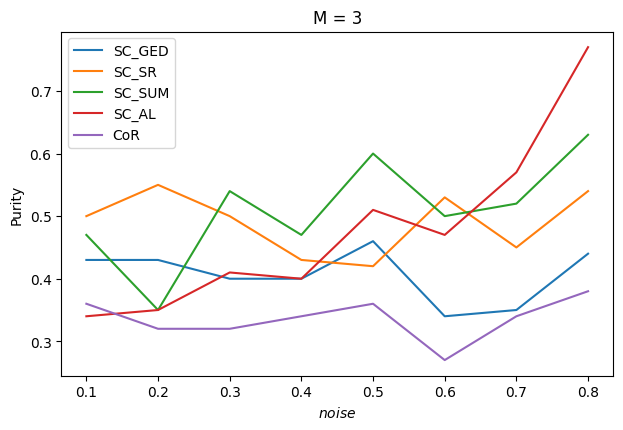

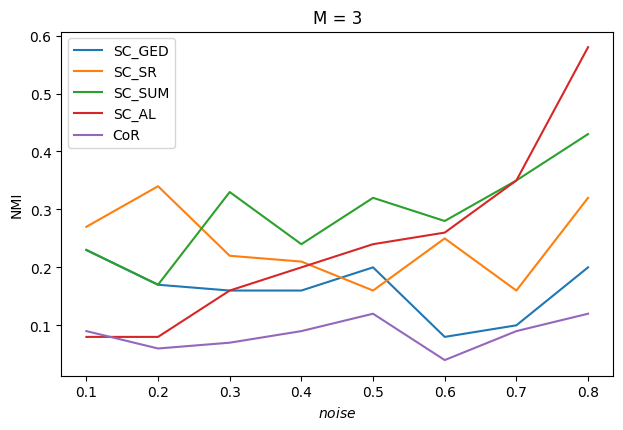

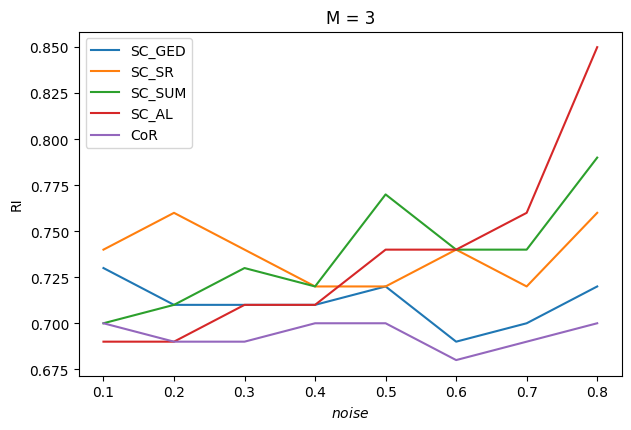

In [42]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, noises[i]][metric.__name__].loc[algorithm.__name__] for i in range(noises.shape[0])]
        plt.plot(noises, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$noise$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [50]:
n = 100
p = HIGH
delta = 0.4
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

noises = np.arange(0.1, 0.9, 0.1)
all_res = {}

for noise in noises:
    prob = np.full((k,M), p)
    prob[:,1] = noise
    prob_prime = np.full((k,k,M), p-delta)
    prob_prime[:,:,1] = np.full((k,k),noise)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "noise = ", noise)
    print(results)
    print("\n")
    all_res[M, noise] = results

M =  3 noise =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.72  0.56  0.84     12.41
SC_SR        0.91  0.82  0.93      0.36
SC_SUM       0.99  0.98  0.99      0.00
SC_AL        0.44  0.14  0.72      0.13
CoR          0.71  0.54  0.83     28.37


M =  3 noise =  0.2
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.97  0.93  0.98      9.53
SC_SR        0.97  0.93  0.98      0.30
SC_SUM       0.97  0.93  0.98      0.00
SC_AL        0.53  0.30  0.75      0.15
CoR          0.76  0.64  0.87     27.43


M =  3 noise =  0.30000000000000004
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.94  0.86  0.95      9.62
SC_SR        0.95  0.88  0.96      0.47
SC_SUM       0.95  0.88  0.96      0.00
SC_AL        0.92  0.82  0.94      0.18
CoR          0.78  0.63  0.87     31.55


M =  3 noise =  0.4
           Purity   NMI    RI  Run Time
Algorithm         

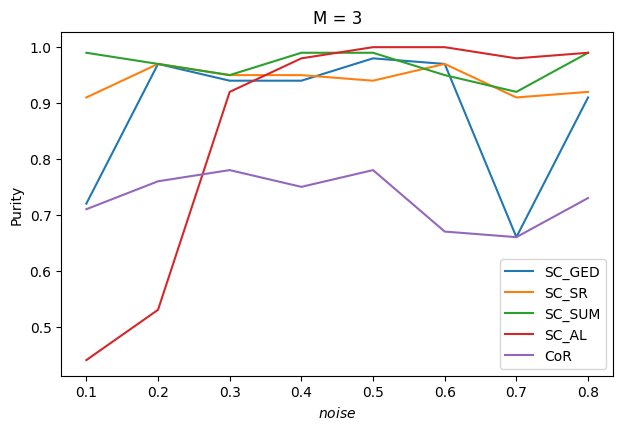

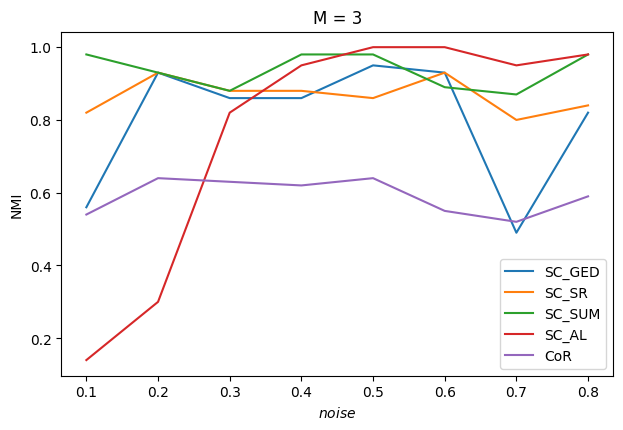

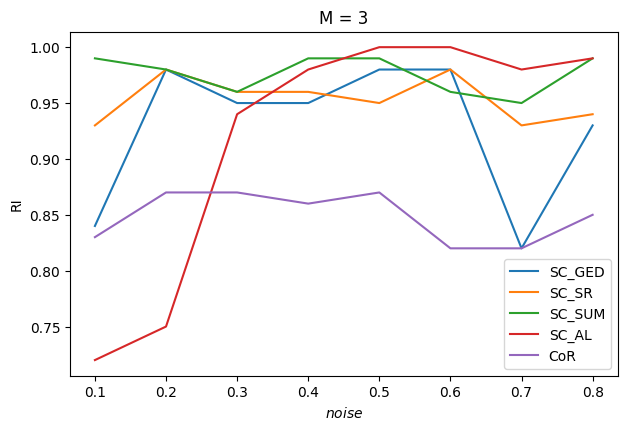

In [51]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, noises[i]][metric.__name__].loc[algorithm.__name__] for i in range(noises.shape[0])]
        plt.plot(noises, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$noise$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [23]:
n = 100
p = HIGH
delta = 0.4
k = 5
M = 3


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR, ourSC_SR]
metrics = [Purity, NMI, RI]

noises = np.arange(0.1, 0.9, 0.1)
all_res = {}

for noise in noises:
    prob = np.full((k,M), p)
    prob[:,1] = noise
    prob[:,2] = 0.3
    prob_prime = np.full((k,k,M), p-delta)
    prob_prime[:,:,1] = np.full((k,k),noise)
    prob_prime[:,:,2] = np.full((k,k),0.1)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_seq_SCSR= np.sort(np.arange(1, M))[::-1])
    print("M = ", M, "noise = ", noise)
    print(results)
    print("\n")
    all_res[M, noise] = results

M =  3 noise =  0.1
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.93  0.84  0.95      2.38
SC_SR        0.96  0.90  0.97      0.19
SC_SUM       0.85  0.73  0.90      0.00
SC_AL        0.37  0.17  0.70      0.03
CoR          0.88  0.73  0.91      5.85
ourSC_SR     0.96  0.90  0.97      0.09


M =  3 noise =  0.2
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.97  0.93  0.98      2.17
SC_SR        0.98  0.95  0.98      0.22
SC_SUM       0.68  0.61  0.82      0.00
SC_AL        0.81  0.61  0.86      0.03
CoR          0.77  0.68  0.87      5.76
ourSC_SR     0.98  0.95  0.98      0.09


M =  3 noise =  0.30000000000000004
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.95  0.89  0.96      2.09
SC_SR        0.96  0.91  0.97      0.21
SC_SUM       0.86  0.73  0.89      0.00
SC_AL        0.91  0.80  0.93      0.03
CoR          0.64  0.51  0.82      6.10


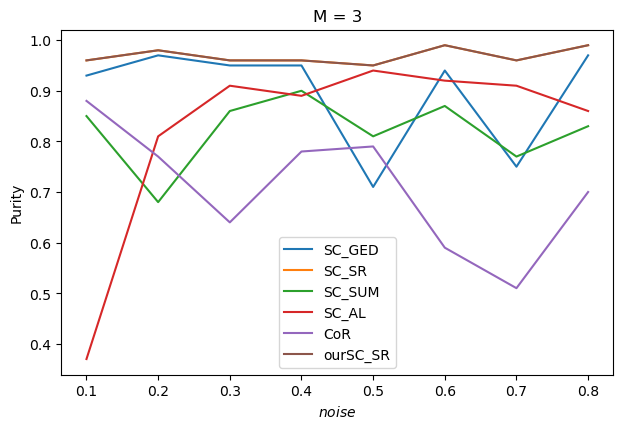

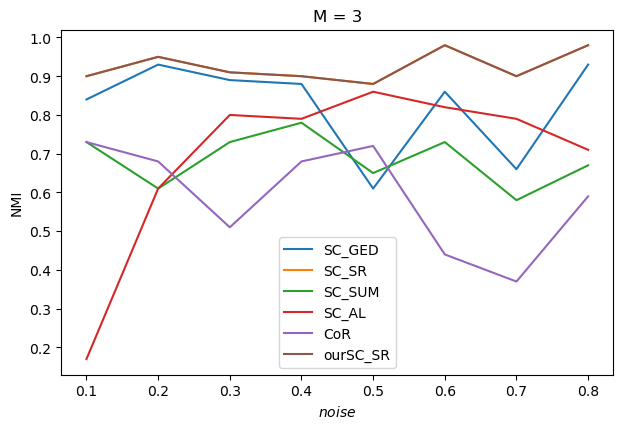

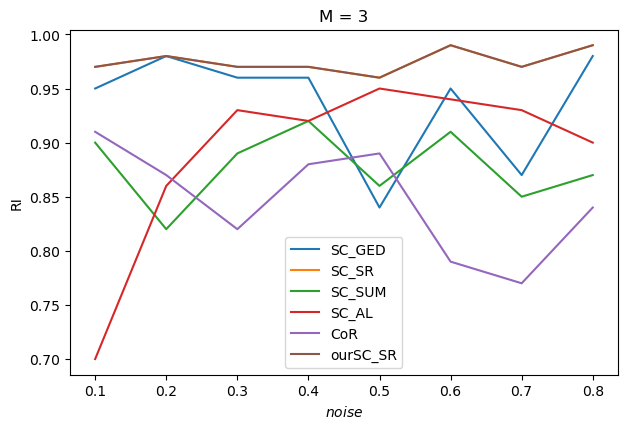

In [25]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M, noises[i]][metric.__name__].loc[algorithm.__name__] for i in range(noises.shape[0])]
        plt.plot(noises, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$noise$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [26]:
n = 100
p = HIGH
delta = 0.4
k = 5
M = 5

noise = 0.4

algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

M_list = np.array([i for i in range(3,10)])
all_res = {}

for M in M_list:
    prob = np.full((k,M), p)
    prob[:,1] = noise
    prob[:,2] = 0.3
    prob[:,3:] = noise

    prob_prime = np.full((k,k,M), p-delta)
    prob_prime[:,:,1] = np.full((k,k),noise)
    prob_prime[:,:,3:] = np.full((k,k,M-3),noise)
    prob_prime[:,:,2] = np.full((k,k),0.1)
    clusters_size = k*[n //k]

    matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
    results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 7.6)
    print("M = ", M, "noise = ", noise)
    print(results)
    print("\n")
    all_res[M] = results

TypeError: runResults() got an unexpected keyword argument 'mu_SCSR'

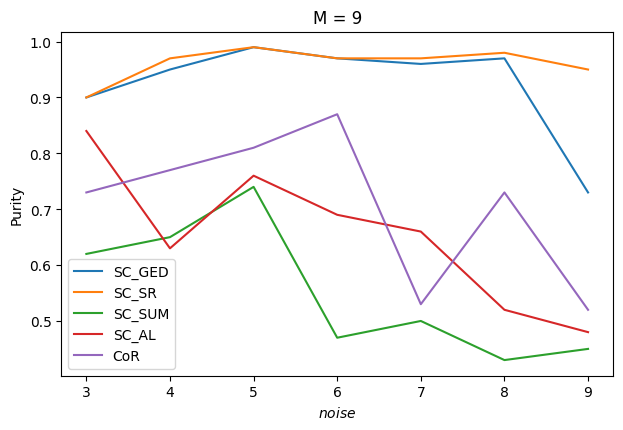

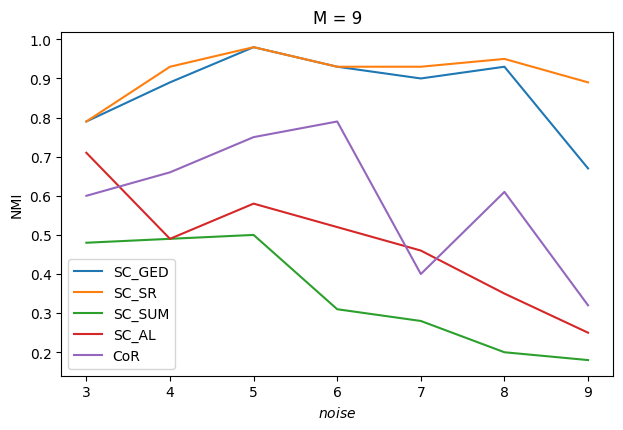

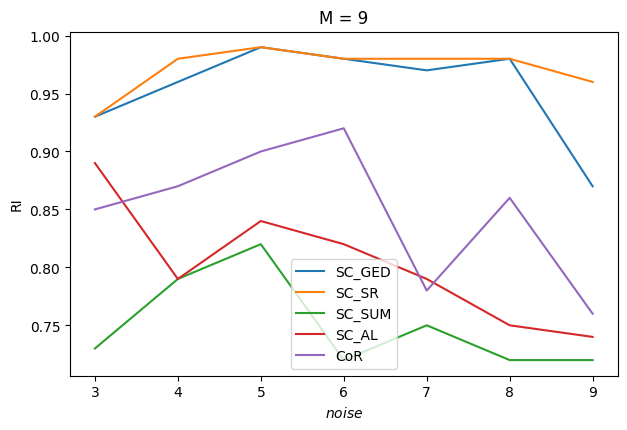

In [ ]:
i = 1
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    plt.subplot(2, 2, i+1)
    for algorithm in algorithms:

        data = [all_res[M_list[i]][metric.__name__].loc[algorithm.__name__] for i in range(M_list.shape[0])]
        plt.plot(M_list, data, label = algorithm.__name__)

    plt.title("M = " + str(M))
    plt.xlabel(r"$noise$")
    plt.ylabel(metric.__name__)
    plt.legend()

    plt.tight_layout()
    plt.show()